In [ ]:
"""
https://www.kaggle.com/rohanrao/air-quality-data-in-india
"""

In [ ]:
!pwd

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/ML/air

/content/drive/MyDrive/ML/air


In [ ]:
!pwd

/content/drive/MyDrive/ML/air


In [ ]:
!ls

air_quality.zip  station_day.csv     ws_2d		  ws_max_2015_FINAL
city_day.csv	 station_day.gsheet  ws_fill		  ws_max_2017
city_day.gsheet  station_hour.csv    ws_max_2015	  ws_max_2017_graph
city_hour.csv	 stations.csv	     ws_max_2015_c_graph
fin		 stations.gsheet     ws_max_2015_cleaned


In [ ]:
import pandas as pd
s_d_df = pd.read_csv("station_day.csv")
s_d_df

StationId        Date  PM2.5    PM10     NO     NO2     NOx    NH3  \
0          AP001  2017-11-24  71.36  115.75   1.75   20.65   12.40  12.19   
1          AP001  2017-11-25  81.40  124.50   1.44   20.50   12.08  10.72   
2          AP001  2017-11-26  78.32  129.06   1.26   26.00   14.85  10.28   
3          AP001  2017-11-27  88.76  135.32   6.60   30.85   21.77  12.91   
4          AP001  2017-11-28  64.18  104.09   2.56   28.07   17.01  11.42   
...          ...         ...    ...     ...    ...     ...     ...    ...   
108030     WB013  2020-06-27   8.65   16.46    NaN     NaN     NaN    NaN   
108031     WB013  2020-06-28  11.80   18.47    NaN     NaN     NaN    NaN   
108032     WB013  2020-06-29  18.60   32.26  13.65  200.87  214.20  11.40   
108033     WB013  2020-06-30  16.07   39.30   7.56   29.13   36.69  29.26   
108034     WB013  2020-07-01  10.50   36.50   7.78   22.50   30.25  27.23   

          CO    SO2      O3  Benzene  Toluene  Xylene    AQI    AQI_Bucket  
0       0.10  10.76  109.26     0.17     5.92    0.10    NaN           NaN  
1       0.12  15.24  127.09     0.20     6.50    0.06  184.0      Moderate  
2       0.14  26.96  117.44     0.22     7.95    0.08  197.0      Moderate  
3       0.11  33.59  111.81     0.29     7.63    0.12  198.0      Moderate  
4       0.09  19.00  138.18     0.17     5.02    0.07  188.0      Moderate  
...      ...    ...     ...      ...      ...     ...    ...           ...  
108030  0.69   4.36   30.59     1.32     7.26     NaN   50.0          Good  
108031  0.68   3.49   38.95     1.42     7.92     NaN   65.0  Satisfactory  
108032  0.78   5.12   38.17     3.52     8.64     NaN   63.0  Satisfactory  
108033  0.69   5.88   29.64     1.86     8.40     NaN   57.0  Satisfactory  
108034  0.58   2.80   13.10     1.31     7.39     NaN   59.0  Satisfactory  

[108035 rows x 16 columns]

In [ ]:
#CREATE STATIONWISE DAY SEPARATE POLLUTANT CSV

import json

date_dic = {}
for index, row in s_d_df.iterrows():
  if str(row['Date']) not in date_dic:
    date_dic[str(row['Date'])] = {}
  date_dic[str(row['Date'])][str(row['StationId'])]={}
  for col in s_d_df.columns[2:]:
    date_dic[str(row['Date'])][str(row['StationId'])][str(col)]=row[str(col)]

print(type(date_dic))
with open("/content/drive/MyDrive/ML/air/ws/s_d_datewise.json", "w") as outfile:
    json.dump(date_dic, outfile, indent = 4)

for col in s_d_df.columns[2:]:
  print(str(col))
  val_dic = {}
  for index, row in s_d_df.iterrows():
    if str(row['Date']) not in val_dic:
      val_dic[str(row['Date'])] = {}
    val_dic[str(row['Date'])][str(row['StationId'])]=[row[str(col)]]
  print(type(val_dic))

  #save json
  target_json="/content/drive/MyDrive/ML/air/ws/s_d_"+str(col)+".json"
  with open(target_json, "w") as outfile:
    json.dump(val_dic, outfile, indent = 4)

  #make df and save csv
  target_csv="/content/drive/MyDrive/ML/air/ws/s_d_"+str(col)+".csv"
  new_df = pd.concat({k: pd.DataFrame(v).T for k, v in val_dic.items()}, axis=1)
  new_df.columns = new_df.columns.droplevel(1)
  new_df=new_df.T
  new_df=new_df.sort_index(axis = 0)
  new_df.to_csv (target_csv) 

In [ ]:
import pandas as pd
c_d_df = pd.read_csv("city_day.csv")
c_d_df

In [ ]:
#CREATE CITYWISE DAY SEPARATE POLLUTANT CSV

import json

date_dic = {}
for index, row in c_d_df.iterrows():
  if str(row['Date']) not in date_dic:
    date_dic[str(row['Date'])] = {}
  date_dic[str(row['Date'])][str(row['City'])]={}
  for col in c_d_df.columns[2:]:
    date_dic[str(row['Date'])][str(row['City'])][str(col)]=row[str(col)]

print(type(date_dic))
with open("/content/drive/MyDrive/ML/air/ws/c_d_datewise.json", "w") as outfile:
    json.dump(date_dic, outfile, indent = 4)

for col in c_d_df.columns[2:]:
  print(str(col))
  val_dic = {}
  for index, row in c_d_df.iterrows():
    if str(row['Date']) not in val_dic:
      val_dic[str(row['Date'])] = {}
    val_dic[str(row['Date'])][str(row['City'])]=[row[str(col)]]
  print(type(val_dic))

  #save json
  target_json="/content/drive/MyDrive/ML/air/ws/c_d_"+str(col)+".json"
  with open(target_json, "w") as outfile:
    json.dump(val_dic, outfile, indent = 4)

  #make df and save csv
  target_csv="/content/drive/MyDrive/ML/air/ws/c_d_"+str(col)+".csv"
  new_df = pd.concat({k: pd.DataFrame(v).T for k, v in val_dic.items()}, axis=1)
  new_df.columns = new_df.columns.droplevel(1)
  new_df=new_df.T
  new_df=new_df.sort_index(axis = 0)
  new_df.to_csv (target_csv) 


In [ ]:
!pwd

/content/drive/MyDrive/ML/air


In [ ]:
"""
cities - 26
C = ['Ahmedabad', 'Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Mumbai', 'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar', 'Jorapokhar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati', 'Brajrajnagar', 'Talcher', 'Kolkata', 'Guwahati', 'Coimbatore', 'Shillong', 'Chandigarh', 'Bhopal', 'Ernakulam', 'Kochi', 'Aizawl']

stations - 110
S = ['AP001', 'AP005', 'BR007', 'DL002', 'DL004', 'DL006', 'DL007', 'DL008', 'DL011', 'DL012', 'DL013', 'DL014', 'DL017', 'DL019', 'DL021', 'DL025', 'DL028', 'DL030', 'DL031', 'DL033', 'DL034', 'GJ001', 'HR014', 'JH001', 'KA003', 'KA005', 'KA009', 'KA010', 'KL008', 'MH005', 'PB001', 'RJ004', 'RJ005', 'RJ006', 'TG001', 'TG002', 'TG003', 'TG004', 'TG005', 'TG006', 'TN001', 'TN003', 'TN004', 'UP012', 'UP014', 'UP016', 'OD001', 'UP015', 'OD002', 'HR011', 'KA002', 'DL003', 'DL009', 'DL010', 'DL015', 'DL016', 'DL018', 'DL022', 'DL023', 'DL024', 'DL026', 'DL027', 'DL032', 'DL035', 'DL037', 'DL038', 'WB013', 'KA004', 'KA006', 'KA008', 'KA011', 'DL020', 'DL029', 'DL036', 'KA007', 'DL005', 'WB011', 'DL001', 'AS001', 'WB009', 'MH012', 'MH013', 'WB010', 'MH007', 'MH010', 'MH009', 'MH014', 'MH006', 'TN005', 'TN002', 'MH011', 'MH008', 'WB012', 'UP013', 'WB008', 'ML001', 'WB007', 'CH001', 'MP001', 'BR008', 'BR009', 'BR010', 'KL002', 'KL004', 'KL007', 'BR005', 'BR006', 'HR012', 'HR013', 'MZ001']
"""

In [ ]:
# FILL NAN GAPS WITH DATA MAX 5

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

missing = 0.2
C = ['Ahmedabad', 'Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Mumbai', 'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar', 'Jorapokhar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati', 'Brajrajnagar', 'Talcher', 'Kolkata', 'Guwahati', 'Coimbatore', 'Shillong', 'Chandigarh', 'Bhopal', 'Ernakulam', 'Kochi', 'Aizawl']
print(C)
S = ['AP001', 'AP005', 'BR007', 'DL002', 'DL004', 'DL006', 'DL007', 'DL008', 'DL011', 'DL012', 'DL013', 'DL014', 'DL017', 'DL019', 'DL021', 'DL025', 'DL028', 'DL030', 'DL031', 'DL033', 'DL034', 'GJ001', 'HR014', 'JH001', 'KA003', 'KA005', 'KA009', 'KA010', 'KL008', 'MH005', 'PB001', 'RJ004', 'RJ005', 'RJ006', 'TG001', 'TG002', 'TG003', 'TG004', 'TG005', 'TG006', 'TN001', 'TN003', 'TN004', 'UP012', 'UP014', 'UP016', 'OD001', 'UP015', 'OD002', 'HR011', 'KA002', 'DL003', 'DL009', 'DL010', 'DL015', 'DL016', 'DL018', 'DL022', 'DL023', 'DL024', 'DL026', 'DL027', 'DL032', 'DL035', 'DL037', 'DL038', 'WB013', 'KA004', 'KA006', 'KA008', 'KA011', 'DL020', 'DL029', 'DL036', 'KA007', 'DL005', 'WB011', 'DL001', 'AS001', 'WB009', 'MH012', 'MH013', 'WB010', 'MH007', 'MH010', 'MH009', 'MH014', 'MH006', 'TN005', 'TN002', 'MH011', 'MH008', 'WB012', 'UP013', 'WB008', 'ML001', 'WB007', 'CH001', 'MP001', 'BR008', 'BR009', 'BR010', 'KL002', 'KL004', 'KL007', 'BR005', 'BR006', 'HR012', 'HR013', 'MZ001']
print(S)

target_path='/content/drive/MyDrive/ML/air/ws2'

source_path='/content/drive/MyDrive/ML/air/ws'
source_list=os.listdir(source_path)
print(source_list)
for csv_file in source_list:
  if str(csv_file.split('.')[-1])=='csv' and str(csv_file.split('.')[0].split('_')[-1])!='Bucket':
    target_csv=os.path.join(target_path,csv_file)
    print('\n\n',csv_file)
    df = pd.read_csv(os.path.join(source_path,csv_file))
    # print(list(df.columns.values))
    # print(df.shape[1])

    new_df = df['Unnamed: 0']

    if str(csv_file.split('_')[0])=='c':
      for col in C:
        dat_lst = (df[col].to_numpy()).flatten()

        # print(dat_lst,type(dat_lst),col)
        nan_arr=np.isnan(dat_lst)
        # print(nan_arr)

        sum1=0
        for i in range(len(dat_lst)-1):
          if i<len(dat_lst)-1 and nan_arr[i]:
            sum1+=1
            if nan_arr[i-1]:
              continue
            elif i<len(dat_lst)-1 and nan_arr[i+1]:
              if i<len(dat_lst)-2 and nan_arr[i+2]:
                if i<len(dat_lst)-3 and nan_arr[i+3]:
                  if i<len(dat_lst)-4 and nan_arr[i+4]:
                    if i<len(dat_lst)-5 and nan_arr[i+5]:
                      continue
                    elif i<len(dat_lst)-5:
                      num=(dat_lst[i+5]-dat_lst[i-1])/6
                      dat_lst[i]=num+dat_lst[i-1]
                      dat_lst[i+1]=dat_lst[i]+num
                      dat_lst[i+2]=dat_lst[i+1]+num
                      dat_lst[i+3]=dat_lst[i+2]+num
                      dat_lst[i+4]=dat_lst[i+3]+num
                    else:
                      continue
                  elif i<len(dat_lst)-4:
                    num=(dat_lst[i+4]-dat_lst[i-1])/5
                    dat_lst[i]=num+dat_lst[i-1]
                    dat_lst[i+1]=dat_lst[i]+num
                    dat_lst[i+2]=dat_lst[i+1]+num
                    dat_lst[i+3]=dat_lst[i+2]+num
                  else:
                    continue
                elif i<len(dat_lst)-3:
                  num=(dat_lst[i+3]-dat_lst[i-1])/4
                  dat_lst[i]=num+dat_lst[i-1]
                  dat_lst[i+1]=dat_lst[i]+num
                  dat_lst[i+2]=dat_lst[i+1]+num
                else:
                  continue
              elif i<len(dat_lst)-2:
                num=(dat_lst[i+2]-dat_lst[i-1])/3
                dat_lst[i]=num+dat_lst[i-1]
                dat_lst[i+1]=dat_lst[i]+num
              else:
                continue
            elif i<len(dat_lst)-1:
              dat_lst[i]=(dat_lst[i-1]+dat_lst[i+1])/2
            else:
              continue
          else:
            continue
        # print(sum1)
        # print(c_d_NO2_df['Kolkata'].isnull().sum())

        # print(dat_lst)
        nan_arr=np.isnan(dat_lst)
        # print(nan_arr)

        sum2=0
        for i in range(len(dat_lst)):
          if nan_arr[i]:
            sum2+=1
        print('({}, {}, {}) {}'.format(len(dat_lst), sum1, sum2, col))
        dat_df=pd.DataFrame(dat_lst, columns=[col])
        new_df=pd.concat([new_df,dat_df],axis=1)

    if str(csv_file.split('_')[0])=='s':
      for col in S:
        dat_lst = (df[col].to_numpy()).flatten()

        # print(dat_lst,type(dat_lst),col)
        nan_arr=np.isnan(dat_lst)
        # print(nan_arr)

        sum1=0
        for i in range(len(dat_lst)-1):
          if i<len(dat_lst)-1 and nan_arr[i]:
            sum1+=1
            if nan_arr[i-1]:
              continue
            elif i<len(dat_lst)-1 and nan_arr[i+1]:
              if i<len(dat_lst)-2 and nan_arr[i+2]:
                if i<len(dat_lst)-3 and nan_arr[i+3]:
                  continue
                elif i<len(dat_lst)-3:
                  num=(dat_lst[i+3]-dat_lst[i-1])/4
                  dat_lst[i]=num+dat_lst[i-1]
                  dat_lst[i+1]=dat_lst[i]+num
                  dat_lst[i+2]=dat_lst[i+1]+num
                else:
                  continue
              elif i<len(dat_lst)-2:
                num=(dat_lst[i+2]-dat_lst[i-1])/3
                dat_lst[i]=num+dat_lst[i-1]
                dat_lst[i+1]=dat_lst[i]+num
              else:
                continue
            elif i<len(dat_lst)-1:
              dat_lst[i]=(dat_lst[i-1]+dat_lst[i+1])/2
            else:
              continue
          else:
            continue
        # print(sum1)
        # print(c_d_NO2_df['Kolkata'].isnull().sum())

        # print(dat_lst)
        nan_arr=np.isnan(dat_lst)
        # print(nan_arr)

        sum2=0
        for i in range(len(dat_lst)):
          if nan_arr[i]:
            sum2+=1
        print('({}, {}, {}) {}'.format(len(dat_lst), sum1, sum2, col))
        dat_df=pd.DataFrame(dat_lst, columns=[col])
        new_df=pd.concat([new_df,dat_df],axis=1)

    print(new_df.shape)
    new_df = new_df.set_index('Unnamed: 0')
    new_df.index.names = ['Date']
    new_df.to_csv(target_csv) 

In [ ]:
# SELECT CITIES/STATIONS WITH MOST DATA

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

missing = 0.2 #missing values
C = ['Ahmedabad', 'Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Mumbai', 'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar', 'Jorapokhar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati', 'Brajrajnagar', 'Talcher', 'Kolkata', 'Guwahati', 'Coimbatore', 'Shillong', 'Chandigarh', 'Bhopal', 'Ernakulam', 'Kochi', 'Aizawl']
print(C)
S = ['AP001', 'AP005', 'BR007', 'DL002', 'DL004', 'DL006', 'DL007', 'DL008', 'DL011', 'DL012', 'DL013', 'DL014', 'DL017', 'DL019', 'DL021', 'DL025', 'DL028', 'DL030', 'DL031', 'DL033', 'DL034', 'GJ001', 'HR014', 'JH001', 'KA003', 'KA005', 'KA009', 'KA010', 'KL008', 'MH005', 'PB001', 'RJ004', 'RJ005', 'RJ006', 'TG001', 'TG002', 'TG003', 'TG004', 'TG005', 'TG006', 'TN001', 'TN003', 'TN004', 'UP012', 'UP014', 'UP016', 'OD001', 'UP015', 'OD002', 'HR011', 'KA002', 'DL003', 'DL009', 'DL010', 'DL015', 'DL016', 'DL018', 'DL022', 'DL023', 'DL024', 'DL026', 'DL027', 'DL032', 'DL035', 'DL037', 'DL038', 'WB013', 'KA004', 'KA006', 'KA008', 'KA011', 'DL020', 'DL029', 'DL036', 'KA007', 'DL005', 'WB011', 'DL001', 'AS001', 'WB009', 'MH012', 'MH013', 'WB010', 'MH007', 'MH010', 'MH009', 'MH014', 'MH006', 'TN005', 'TN002', 'MH011', 'MH008', 'WB012', 'UP013', 'WB008', 'ML001', 'WB007', 'CH001', 'MP001', 'BR008', 'BR009', 'BR010', 'KL002', 'KL004', 'KL007', 'BR005', 'BR006', 'HR012', 'HR013', 'MZ001']
print(S)

target_path='/content/drive/MyDrive/ML/air/ws3'

source_path='/content/drive/MyDrive/ML/air/ws2'
source_list=os.listdir(source_path)
print(source_list)
for csv_file in source_list:
  if str(csv_file.split('.')[-1])=='csv':
    target_csv=os.path.join(target_path,csv_file)
    df = pd.read_csv(os.path.join(source_path,csv_file))
    # print(list(df.columns.values))
    # print(df.shape[1])

    new_df = df['Date']

    if str(csv_file.split('_')[0])=='c':
      for col in C:
        # print(df[col].isnull().sum())
        if df[col].isnull().sum()<=new_df.shape[0]*missing:
          new_df = pd.concat([new_df, df[col]], join = 'outer', axis = 1)

    if str(csv_file.split('_')[0])=='s':
      for col in S:
        # print(df[col].isnull().sum())
        if df[col].isnull().sum()<=new_df.shape[0]*missing:
          new_df = pd.concat([new_df, df[col]], join = 'outer', axis = 1)

    print('({}, {}) {}'.format(df.shape[1],new_df.shape[1],csv_file))
    new_df.to_csv(target_csv, index=False) 

['Ahmedabad', 'Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Mumbai', 'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar', 'Jorapokhar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati', 'Brajrajnagar', 'Talcher', 'Kolkata', 'Guwahati', 'Coimbatore', 'Shillong', 'Chandigarh', 'Bhopal', 'Ernakulam', 'Kochi', 'Aizawl']
['AP001', 'AP005', 'BR007', 'DL002', 'DL004', 'DL006', 'DL007', 'DL008', 'DL011', 'DL012', 'DL013', 'DL014', 'DL017', 'DL019', 'DL021', 'DL025', 'DL028', 'DL030', 'DL031', 'DL033', 'DL034', 'GJ001', 'HR014', 'JH001', 'KA003', 'KA005', 'KA009', 'KA010', 'KL008', 'MH005', 'PB001', 'RJ004', 'RJ005', 'RJ006', 'TG001', 'TG002', 'TG003', 'TG004', 'TG005', 'TG006', 'TN001', 'TN003', 'TN004', 'UP012', 'UP014', 'UP016', 'OD001', 'UP015', 'OD002', 'HR011', 'KA002', 'DL003', 'DL009', 'DL010', 'DL015', 'DL016', 'DL018', 'DL022', 'DL023', 'DL024', 'DL026', 'DL027', 'DL032', 'DL035', 'DL037', 'DL038', 'WB013', 'KA004', 'KA006', 'KA008', 'KA011', 'DL020', 'DL029', 'DL036', 'KA007', 'D

['s_d_PM2.5.csv', 's_d_PM10.csv', 's_d_O3.csv', 's_d_NO.csv', 's_d_SO2.csv', 's_d_Benzene.csv', 's_d_NO2.csv', 's_d_NOx.csv', 's_d_CO.csv', 's_d_NH3.csv', 's_d_Toluene.csv', 's_d_Xylene.csv', 'c_d_PM2.5.csv', 's_d_AQI.csv', 'c_d_NO.csv', 'c_d_NO2.csv', 'c_d_PM10.csv', 'c_d_NOx.csv', 'c_d_NH3.csv', 'c_d_O3.csv', 'c_d_CO.csv', 'c_d_SO2.csv', 'c_d_Toluene.csv', 'c_d_Xylene.csv', 'c_d_Benzene.csv', 'c_d_AQI.csv']


 c_d_PM2.5.csv
['Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Hyderabad']


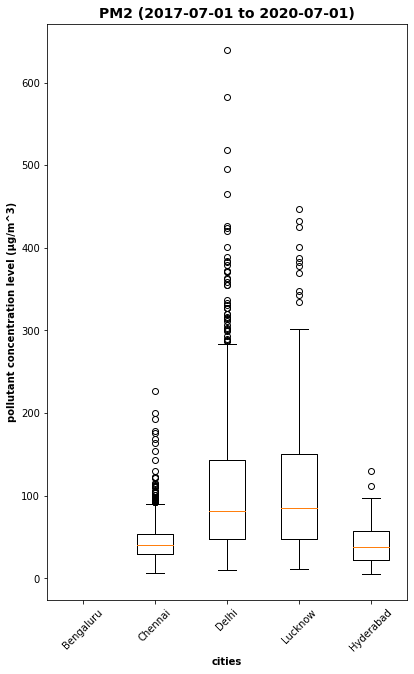



 c_d_NO.csv
['Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Hyderabad', 'Patna']


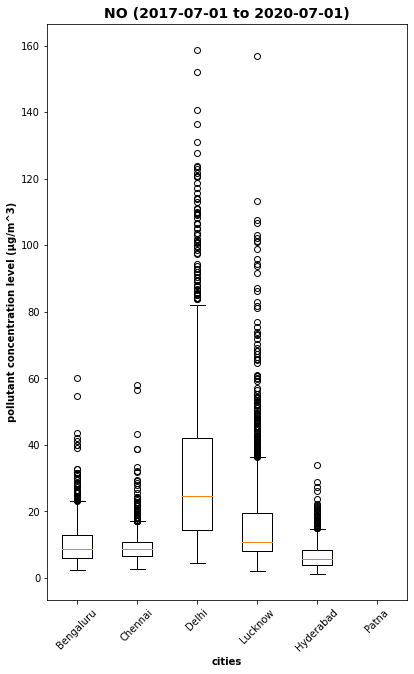



 c_d_NO2.csv
['Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Hyderabad', 'Patna']


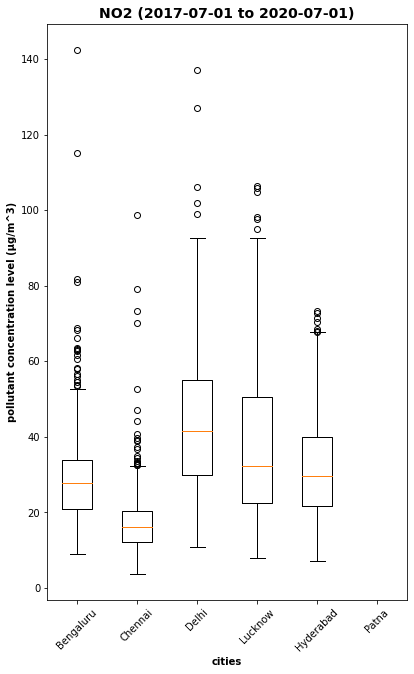



 c_d_PM10.csv
['Bengaluru', 'Delhi', 'Hyderabad']


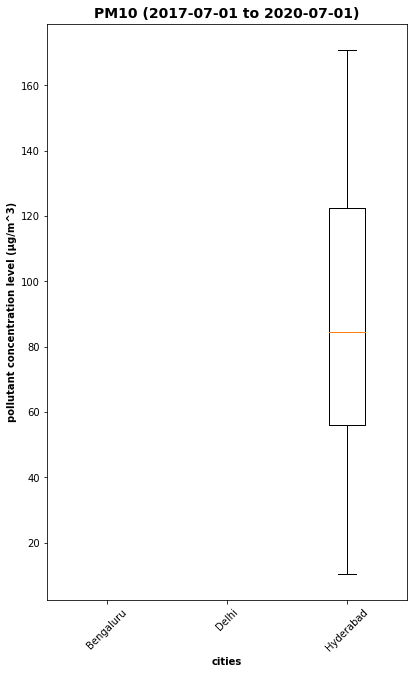



 c_d_NOx.csv
['Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Hyderabad', 'Patna']


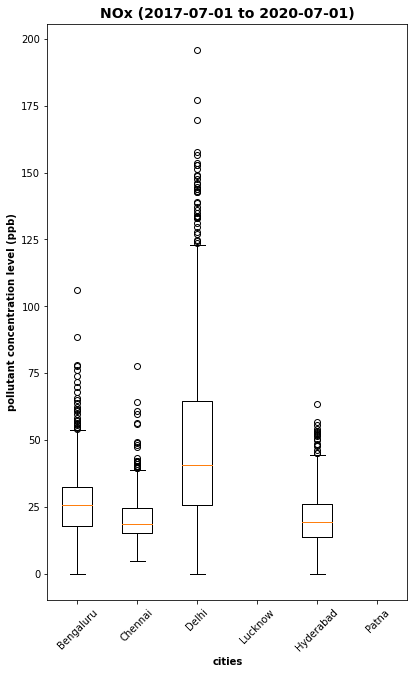



 c_d_NH3.csv
['Bengaluru', 'Delhi', 'Hyderabad']


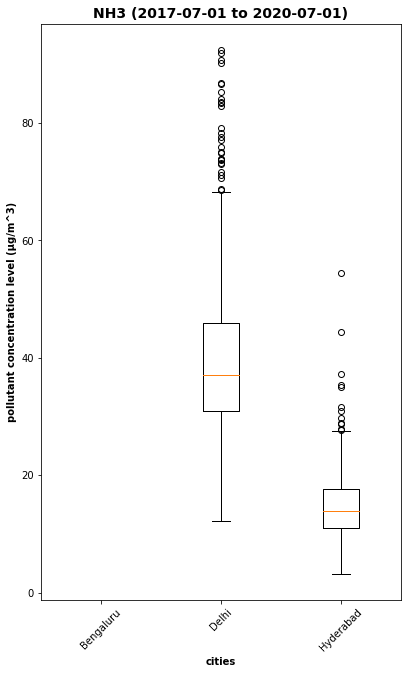



 c_d_O3.csv
['Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Hyderabad', 'Gurugram']


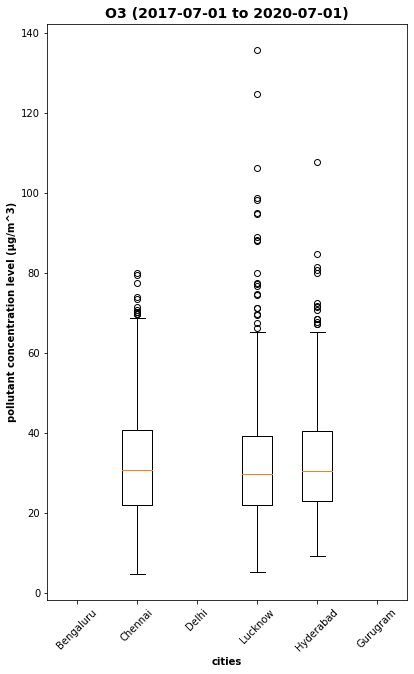



 c_d_CO.csv
['Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Mumbai', 'Hyderabad', 'Patna', 'Gurugram']


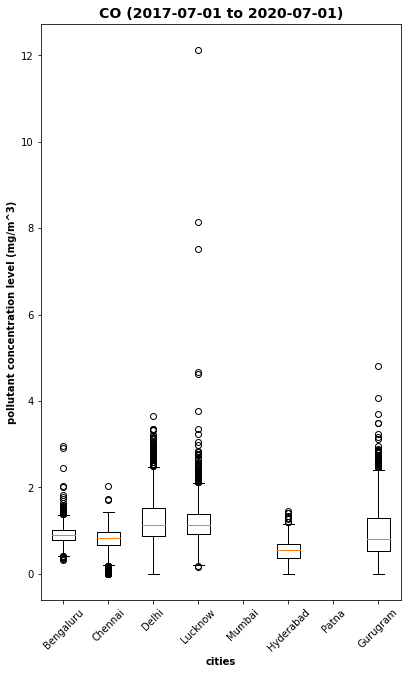



 c_d_SO2.csv
['Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Hyderabad', 'Patna']


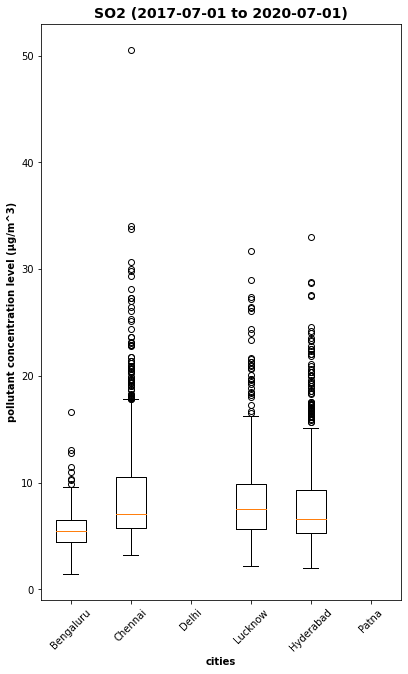



 c_d_Toluene.csv
['Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Hyderabad', 'Patna']


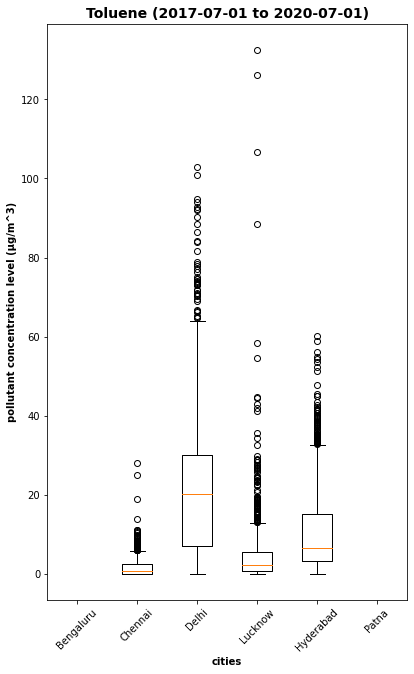



 c_d_Xylene.csv
['Hyderabad', 'Patna']


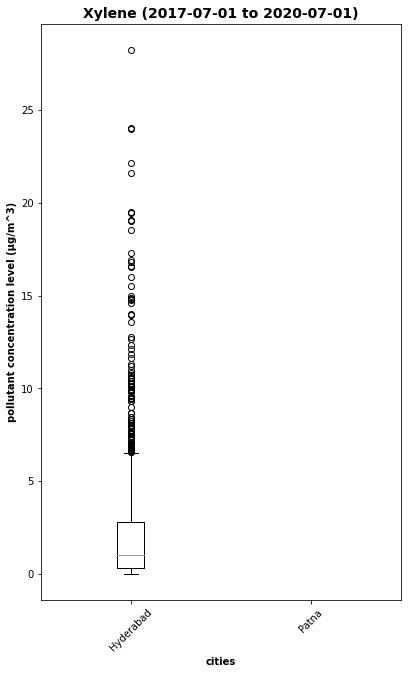



 c_d_Benzene.csv
['Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Mumbai', 'Hyderabad', 'Patna']


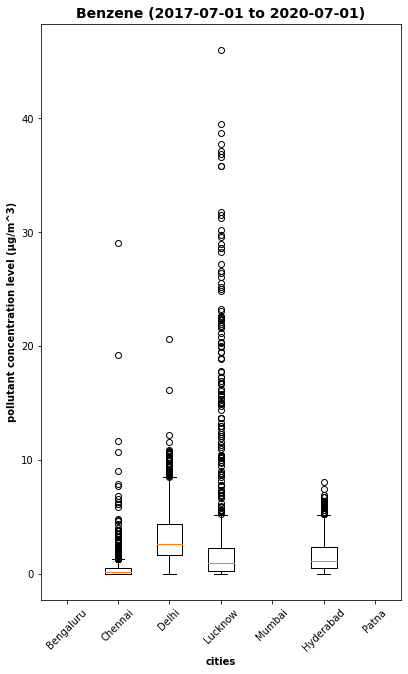



 c_d_AQI.csv
['Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Hyderabad']


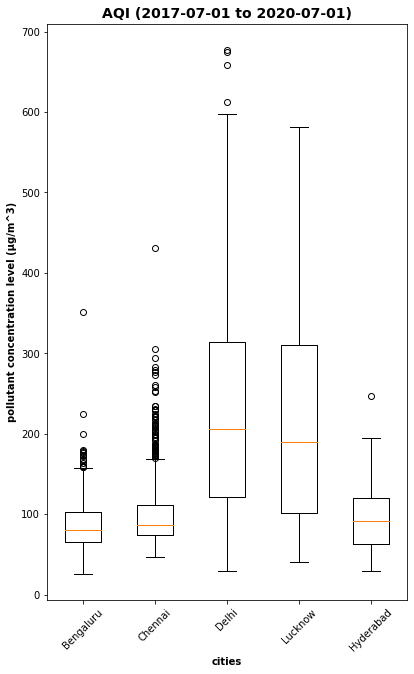

In [ ]:
# #MAKE BOXPLOT

# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import os

# target_path='/content/drive/MyDrive/ML/air/graphs'

# source_path='/content/drive/MyDrive/ML/air/ws3'
# source_list=os.listdir(source_path)
# print(source_list)

# for csv_file in source_list:
#   if str(csv_file.split('.')[-1])=='csv' and str(csv_file.split('.')[0].split('_')[0])!='s':
#     target_file=os.path.join(target_path,csv_file.split('.')[0])
#     print('\n\n',csv_file)
#     df = pd.read_csv(os.path.join(source_path,csv_file))
#     # print(df)

#     C=[]
#     for col in df.columns[1:]:
#       C.append(col)
#     print(C)

#     # Creating dataset
#     np.random.seed(10)

#     start=912
#     start_date=(df['Date'].to_numpy()).flatten()[start]
#     end_date=(df['Date'].to_numpy()).flatten()[len((df['Date'].to_numpy()).flatten())-1]
#     data=[]
#     for col in C:
#       data_n = (df[col].to_numpy()).flatten()
#       data.append(data_n[start:])
#     # print(len(data))

#     fig = plt.figure(figsize =(5, 8))

#     # Creating axes instance
#     ax = fig.add_axes([0, 0, 1, 1])
#     ax.set_xticklabels(C, rotation=45, fontsize=10)

#     # Creating labels
#     if csv_file.split('.')[0].split('_')[-1] in ['PM2', 'PM10', 'NO', 'NO2', 'NH3', 'SO2']:
#       level='µg/m^3'
#     elif csv_file.split('.')[0].split('_')[-1] in ['CO']:
#       level='mg/m^3'
#     elif csv_file.split('.')[0].split('_')[-1] in ['NOx']:
#       level='ppb'

#     ax.set_title(csv_file.split('.')[0].split('_')[-1]+' ({} to {})'.format(start_date, end_date), fontsize=14, fontweight='bold')
#     ax.set_xlabel('Cities',fontsize=10, fontweight='bold')
#     if csv_file.split('.')[0].split('_')[-1] in ['AQI']:
#       ax.set_ylabel('Air Quality Index',fontsize=10, fontweight='bold')
#     else:
#       ax.set_ylabel('Pollutant Concentration Level ({})'.format(level),fontsize=10, fontweight='bold')

#     # Creating plot
#     bp = ax.boxplot(data)

#     # save and show plot
#     plt.savefig(target_file+'_box.png',bbox_inches='tight')
#     plt.show()
#     plt.close()

In [ ]:
!pwd

/content


In [ ]:
# # SELECT CITIES/STATIONS WITH MOST DATA FROM 2017-07-01

# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import os

# missing = 0.2 #missing values
# C = ['Ahmedabad', 'Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Mumbai', 'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar', 'Jorapokhar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati', 'Brajrajnagar', 'Talcher', 'Kolkata', 'Guwahati', 'Coimbatore', 'Shillong', 'Chandigarh', 'Bhopal', 'Ernakulam', 'Kochi', 'Aizawl']
# print(C)
# S = ['AP001', 'AP005', 'BR007', 'DL002', 'DL004', 'DL006', 'DL007', 'DL008', 'DL011', 'DL012', 'DL013', 'DL014', 'DL017', 'DL019', 'DL021', 'DL025', 'DL028', 'DL030', 'DL031', 'DL033', 'DL034', 'GJ001', 'HR014', 'JH001', 'KA003', 'KA005', 'KA009', 'KA010', 'KL008', 'MH005', 'PB001', 'RJ004', 'RJ005', 'RJ006', 'TG001', 'TG002', 'TG003', 'TG004', 'TG005', 'TG006', 'TN001', 'TN003', 'TN004', 'UP012', 'UP014', 'UP016', 'OD001', 'UP015', 'OD002', 'HR011', 'KA002', 'DL003', 'DL009', 'DL010', 'DL015', 'DL016', 'DL018', 'DL022', 'DL023', 'DL024', 'DL026', 'DL027', 'DL032', 'DL035', 'DL037', 'DL038', 'WB013', 'KA004', 'KA006', 'KA008', 'KA011', 'DL020', 'DL029', 'DL036', 'KA007', 'DL005', 'WB011', 'DL001', 'AS001', 'WB009', 'MH012', 'MH013', 'WB010', 'MH007', 'MH010', 'MH009', 'MH014', 'MH006', 'TN005', 'TN002', 'MH011', 'MH008', 'WB012', 'UP013', 'WB008', 'ML001', 'WB007', 'CH001', 'MP001', 'BR008', 'BR009', 'BR010', 'KL002', 'KL004', 'KL007', 'BR005', 'BR006', 'HR012', 'HR013', 'MZ001']
# print(S)

# target_path='/content/drive/MyDrive/ML/air/ws4'

# source_path='/content/drive/MyDrive/ML/air/ws2'
# source_list=os.listdir(source_path)
# print(source_list)
# for csv_file in source_list:
#   if str(csv_file.split('.')[-1])=='csv':
#     target_csv=os.path.join(target_path,csv_file)
#     df = pd.read_csv(os.path.join(source_path,csv_file))

#     # print(list(df.columns.values))
#     # print(df.shape[1])
#     df = df.iloc[912:]
#     print(df)

#     new_df = df['Date']

#     if str(csv_file.split('_')[0])=='c':
#       for col in C:
#         # print(df[col].isnull().sum())
#         if df[col].isnull().sum()<=new_df.shape[0]*missing:
#           new_df = pd.concat([new_df, df[col]], join = 'outer', axis = 1)

#     if str(csv_file.split('_')[0])=='s':
#       for col in S:
#         # print(df[col].isnull().sum())
#         if df[col].isnull().sum()<=new_df.shape[0]*missing:
#           new_df = pd.concat([new_df, df[col]], join = 'outer', axis = 1)

#     print('({}, {}) {}'.format(df.shape[1],new_df.shape[1],csv_file))
#     new_df.to_csv(target_csv, index=False) 

['c_d_AQI.csv', 'c_d_Benzene.csv', 'c_d_CO.csv', 'c_d_NH3.csv', 'c_d_NO.csv', 'c_d_NO2.csv', 'c_d_NOx.csv', 'c_d_O3.csv', 'c_d_PM2.5.csv', 'c_d_PM10.csv', 'c_d_SO2.csv', 'c_d_Toluene.csv', 'c_d_Xylene.csv', 's_d_PM2.5.csv', 's_d_PM10.csv', 's_d_NO.csv', 's_d_NO2.csv', 's_d_NOx.csv', 's_d_NH3.csv', 's_d_CO.csv', 's_d_SO2.csv', 's_d_Benzene.csv', 's_d_O3.csv', 's_d_Toluene.csv', 's_d_Xylene.csv', 's_d_AQI.csv']


 c_d_AQI.csv
['Ahmedabad', 'Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati']


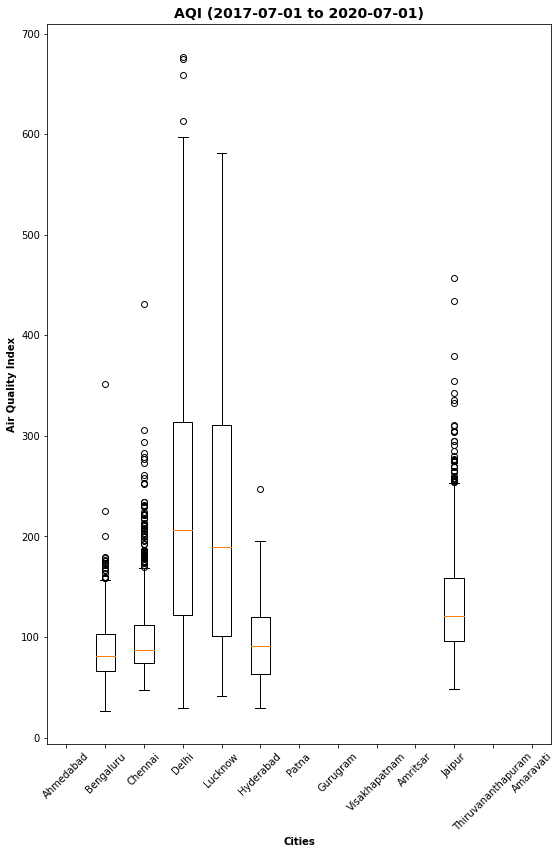



 c_d_Benzene.csv
['Ahmedabad', 'Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Mumbai', 'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar', 'Jaipur', 'Amaravati']


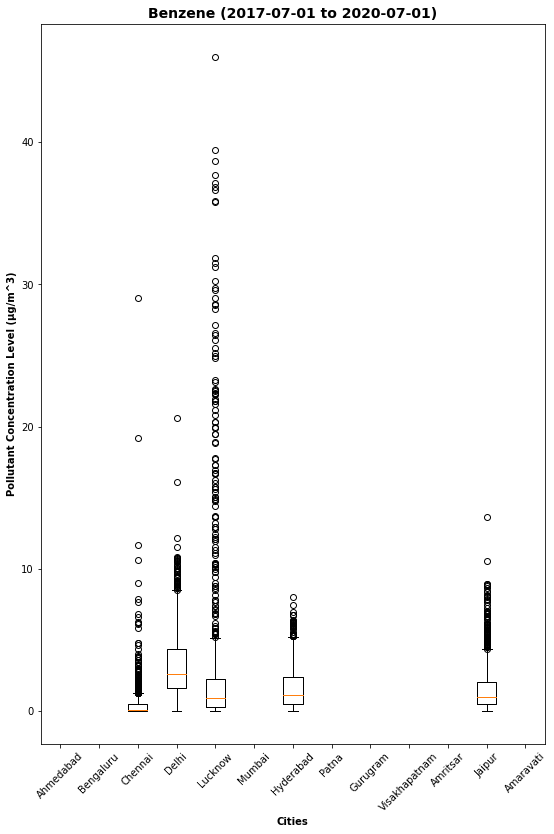



 c_d_CO.csv
['Ahmedabad', 'Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Mumbai', 'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar', 'Jaipur', 'Thiruvananthapuram']


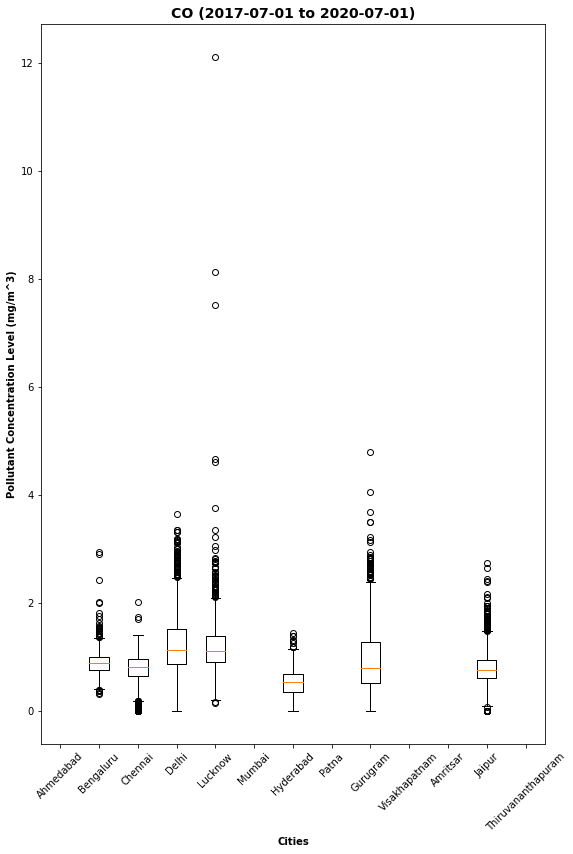



 c_d_NH3.csv
['Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Hyderabad', 'Visakhapatnam', 'Amritsar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati']


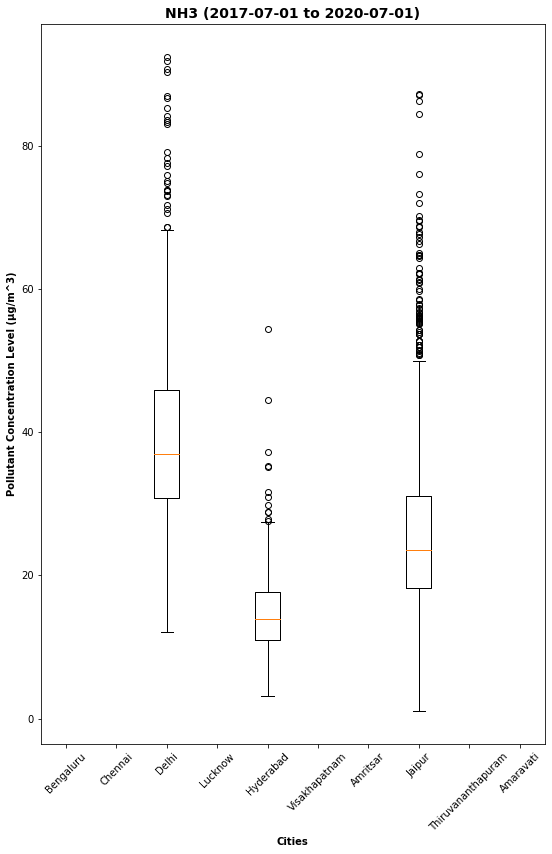



 c_d_NO.csv
['Ahmedabad', 'Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar', 'Jorapokhar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati']


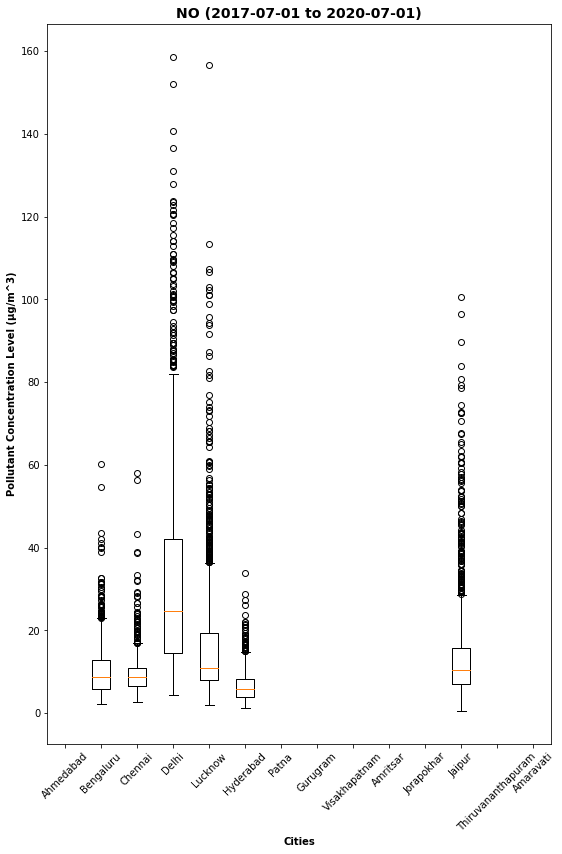



 c_d_NO2.csv
['Ahmedabad', 'Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar', 'Jorapokhar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati']


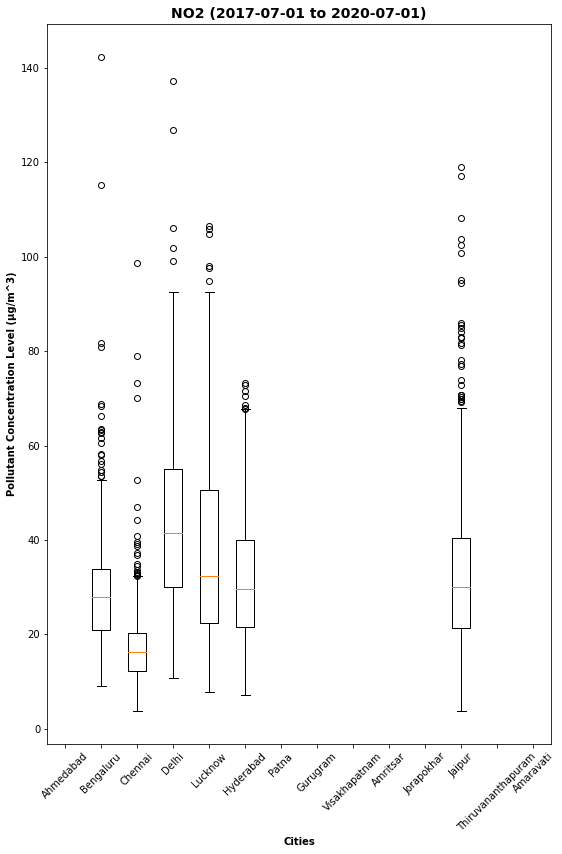



 c_d_NOx.csv
['Ahmedabad', 'Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Mumbai', 'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati']


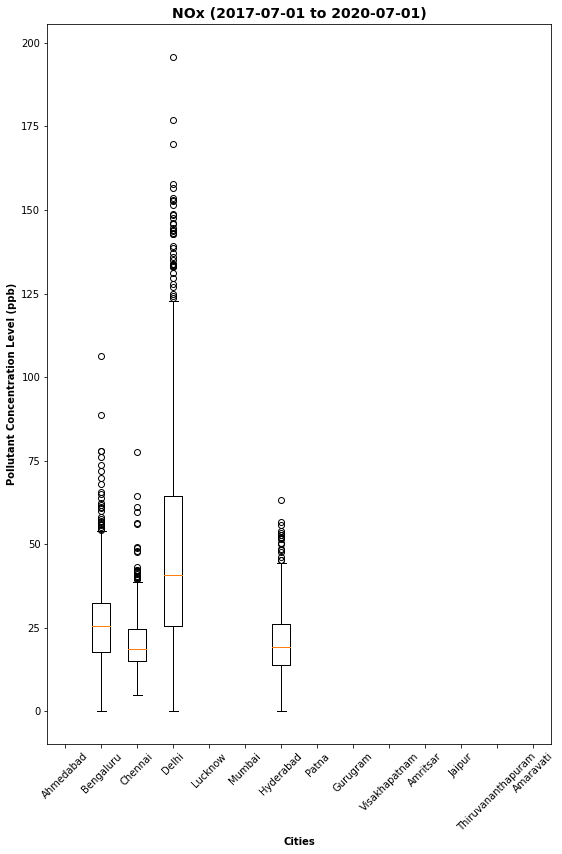



 c_d_O3.csv
['Ahmedabad', 'Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar', 'Jorapokhar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati']


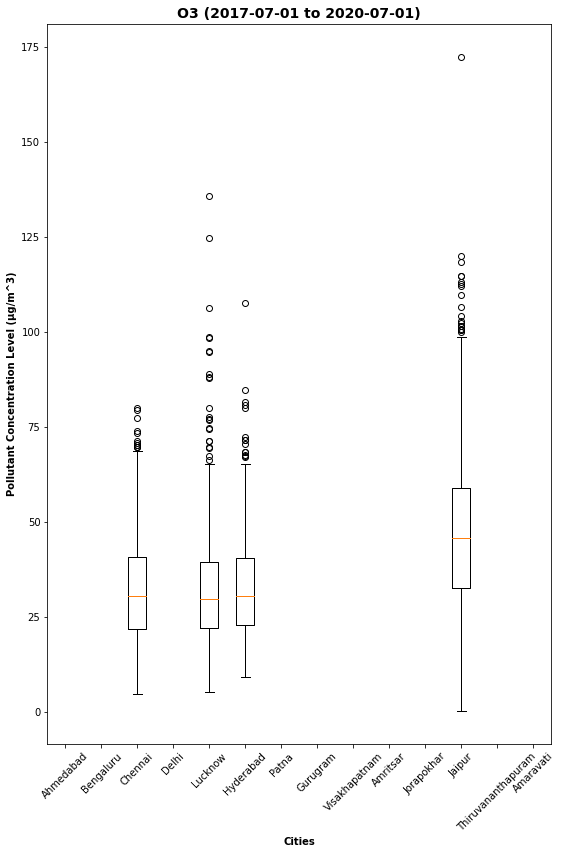



 c_d_PM2.5.csv
['Ahmedabad', 'Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati']


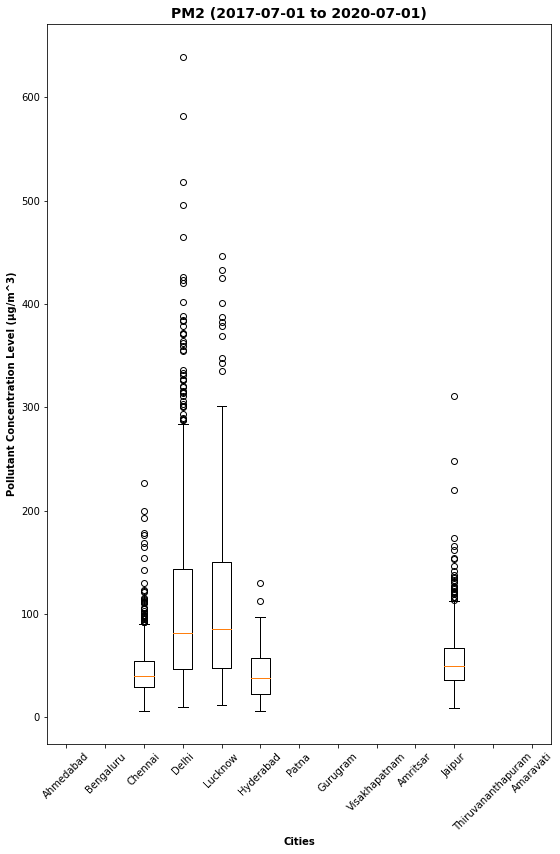



 c_d_PM10.csv
['Bengaluru', 'Delhi', 'Hyderabad', 'Visakhapatnam', 'Amritsar', 'Jorapokhar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati']


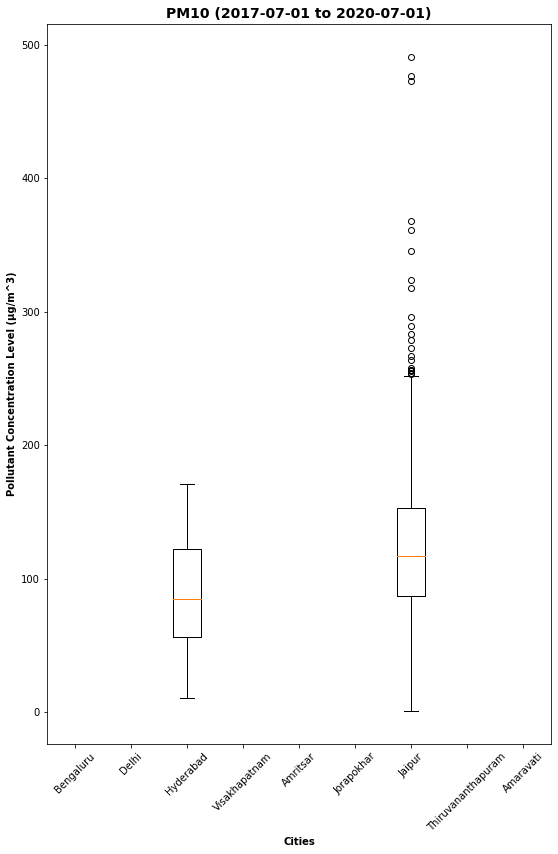



 c_d_SO2.csv
['Ahmedabad', 'Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati']


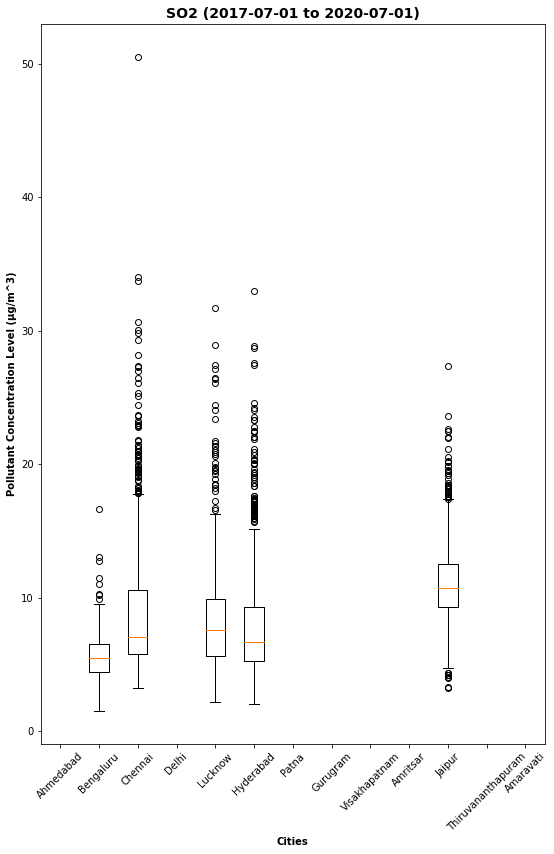



 c_d_Toluene.csv
['Ahmedabad', 'Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Hyderabad', 'Patna', 'Visakhapatnam', 'Amritsar', 'Jaipur', 'Amaravati']


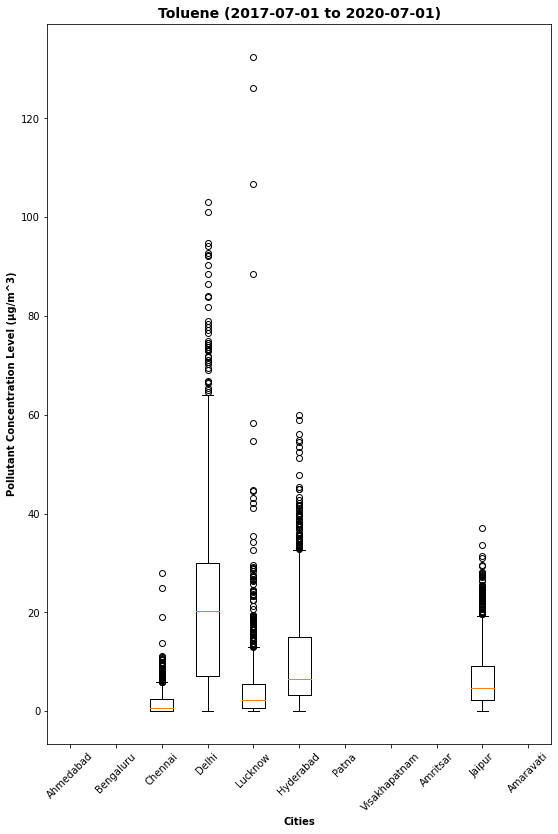



 c_d_Xylene.csv
['Ahmedabad', 'Delhi', 'Hyderabad', 'Patna', 'Visakhapatnam', 'Amritsar']


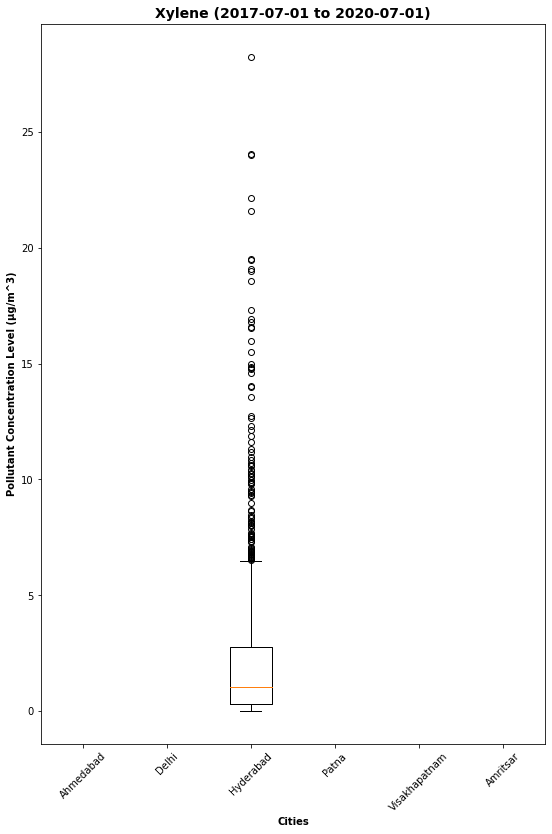

In [ ]:
# #MAKE BOXPLOT FINAL

# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import os

# target_path='/content/drive/MyDrive/ML/air/graphs2'

# source_path='/content/drive/MyDrive/ML/air/ws4'
# source_list=os.listdir(source_path)
# print(source_list)

# for csv_file in source_list:
#   if str(csv_file.split('.')[-1])=='csv' and str(csv_file.split('.')[0].split('_')[0])!='s':
#     target_file=os.path.join(target_path,csv_file.split('.')[0])
#     print('\n\n',csv_file)
#     df = pd.read_csv(os.path.join(source_path,csv_file))
#     # print(df)

#     C=[]
#     for col in df.columns[1:]:
#       C.append(col)
#     print(C)

#     # Creating dataset
#     np.random.seed(10)

#     start=0
#     start_date=(df['Date'].to_numpy()).flatten()[start]
#     end_date=(df['Date'].to_numpy()).flatten()[len((df['Date'].to_numpy()).flatten())-1]
#     data=[]
#     for col in C:
#       data_n = (df[col].to_numpy()).flatten()
#       data.append(data_n[start:])
#     # print(len(data))

#     fig = plt.figure(figsize =(7, 10))

#     # Creating axes instance
#     ax = fig.add_axes([0, 0, 1, 1])
#     ax.set_xticklabels(C, rotation=45, fontsize=10)

#     # Creating labels
#     if csv_file.split('.')[0].split('_')[-1] in ['PM2', 'PM10', 'NO', 'NO2', 'NH3', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']:
#       level='µg/m^3'
#     elif csv_file.split('.')[0].split('_')[-1] in ['CO']:
#       level='mg/m^3'
#     elif csv_file.split('.')[0].split('_')[-1] in ['NOx']:
#       level='ppb'

#     ax.set_title(csv_file.split('.')[0].split('_')[-1]+' ({} to {})'.format(start_date, end_date), fontsize=14, fontweight='bold')
#     ax.set_xlabel('Cities',fontsize=10, fontweight='bold')
#     if csv_file.split('.')[0].split('_')[-1] in ['AQI']:
#       ax.set_ylabel('Air Quality Index',fontsize=10, fontweight='bold')
#     else:
#       ax.set_ylabel('Pollutant Concentration Level ({})'.format(level),fontsize=10, fontweight='bold')

#     # Creating plot
#     bp = ax.boxplot(data)

#     # save and show plot
#     plt.savefig(target_file+'_box.png',bbox_inches='tight')
#     plt.show()
#     plt.close()

['c_d_NH3_fin.csv', 'c_d_AQI_fin.csv', 'c_d_Benzene_fin.csv', 'c_d_NO_fin.csv', 'c_d_NO2_fin.csv', 'c_d_NOx_fin.csv', 'c_d_O3_fin.csv', 'c_d_PM2.5_fin.csv', 'c_d_PM10_fin.csv', 'c_d_SO2_fin.csv', 'c_d_Toluene_fin.csv', 'fin_graphs', 'c_d_CO_fin.csv']


 c_d_NH3_fin.csv
['Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Hyderabad', 'Visakhapatnam', 'Amritsar', 'Jaipur', 'Thiruvananthapuram']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


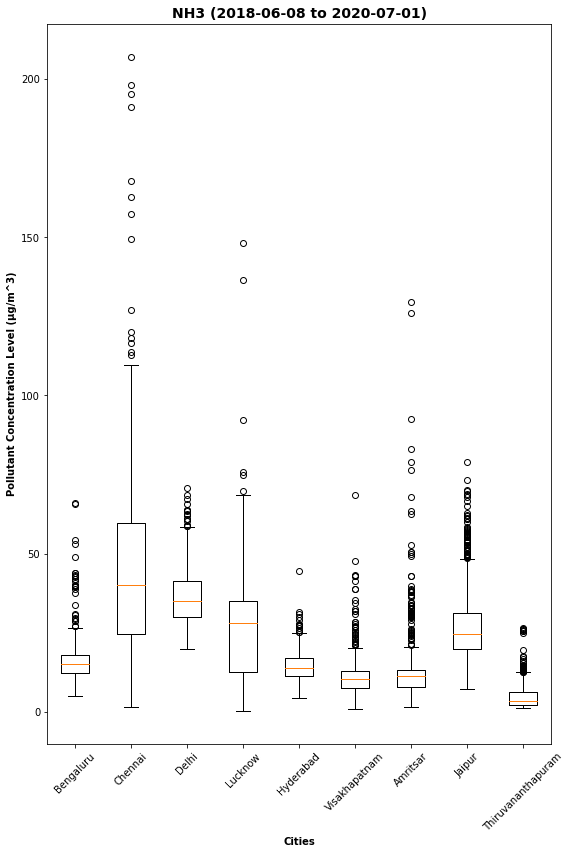



 c_d_AQI_fin.csv
['Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar', 'Jaipur', 'Thiruvananthapuram']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


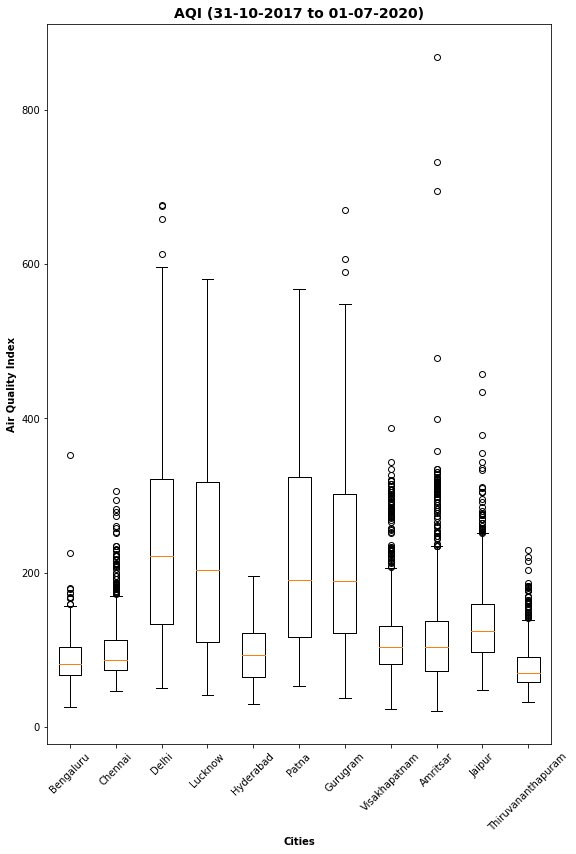



 c_d_Benzene_fin.csv
['Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Mumbai', 'Hyderabad', 'Patna', 'Visakhapatnam', 'Jaipur']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


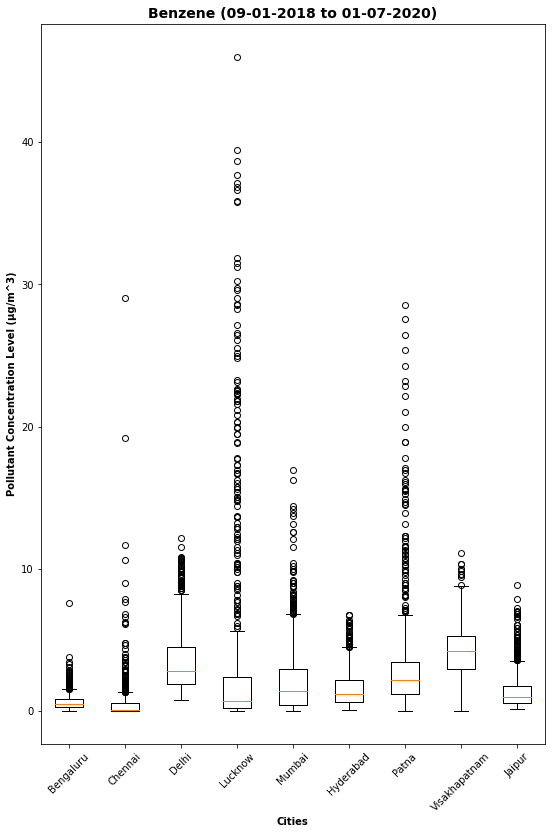



 c_d_NO_fin.csv
['Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Jaipur', 'Thiruvananthapuram']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


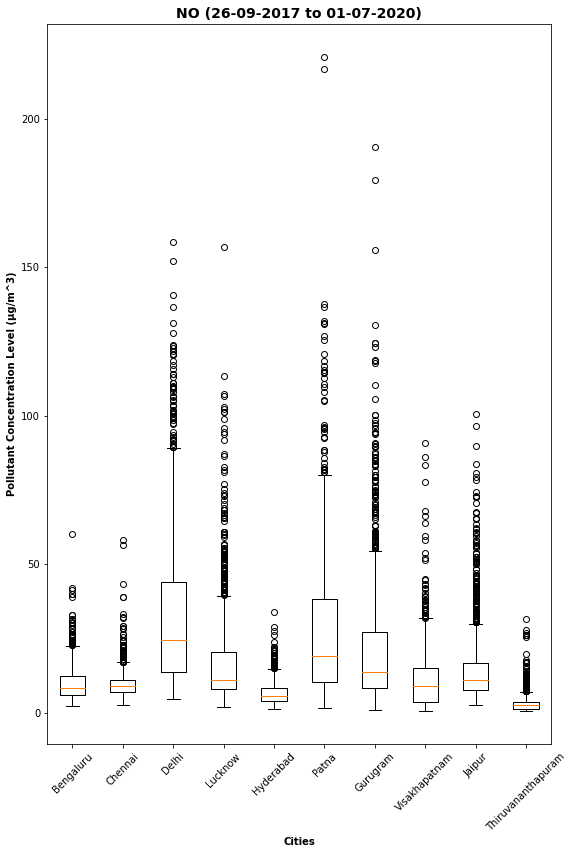



 c_d_NO2_fin.csv
['Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Hyderabad', 'Patna', 'Gurugram', 'Amritsar', 'Jaipur', 'Thiruvananthapuram']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


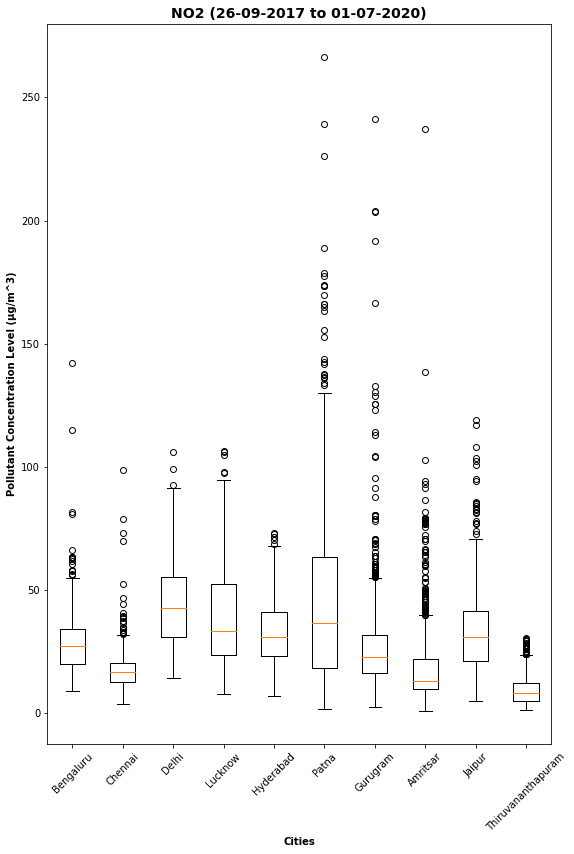



 c_d_NOx_fin.csv
['Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Hyderabad', 'Patna', 'Visakhapatnam', 'Jaipur', 'Thiruvananthapuram']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


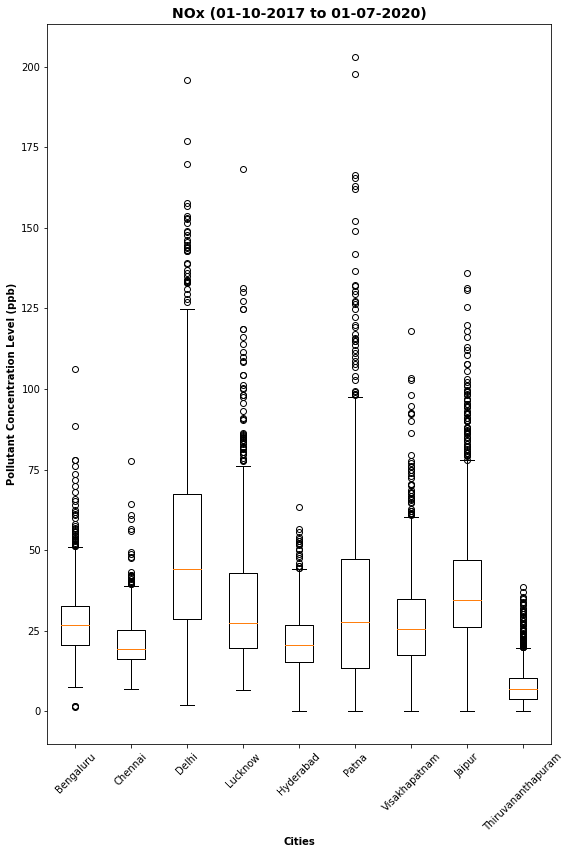



 c_d_O3_fin.csv
['Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Hyderabad', 'Gurugram', 'Jaipur', 'Thiruvananthapuram']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


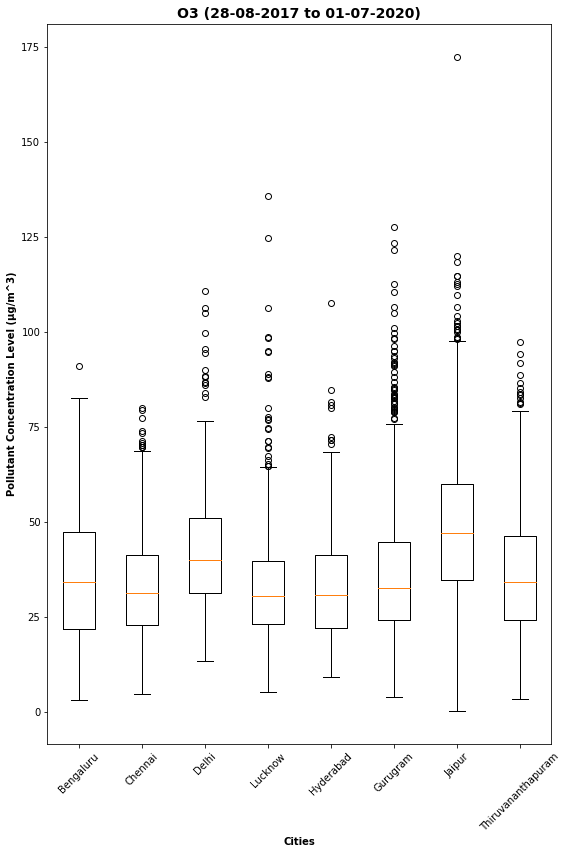



 c_d_PM2.5_fin.csv
['Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Hyderabad', 'Gurugram', 'Jaipur', 'Thiruvananthapuram']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


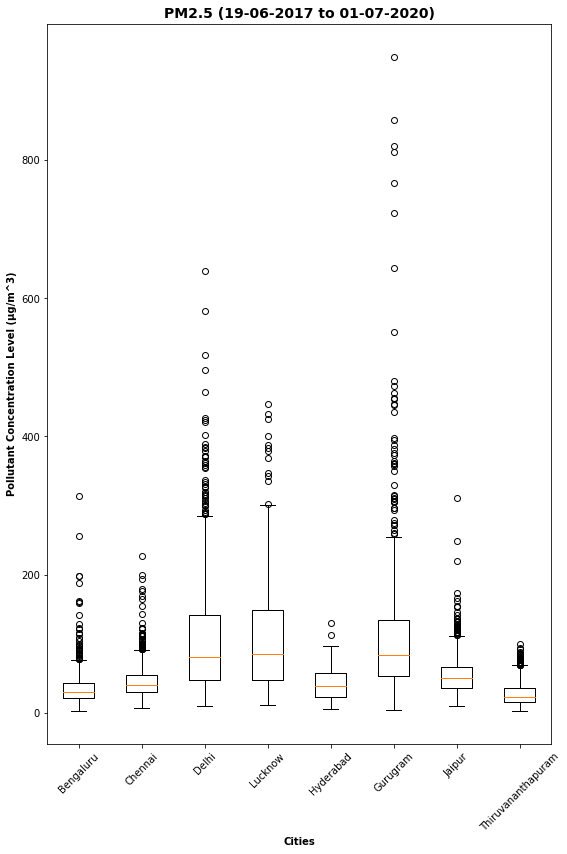



 c_d_PM10_fin.csv
['Bengaluru', 'Delhi', 'Hyderabad', 'Jaipur', 'Thiruvananthapuram']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


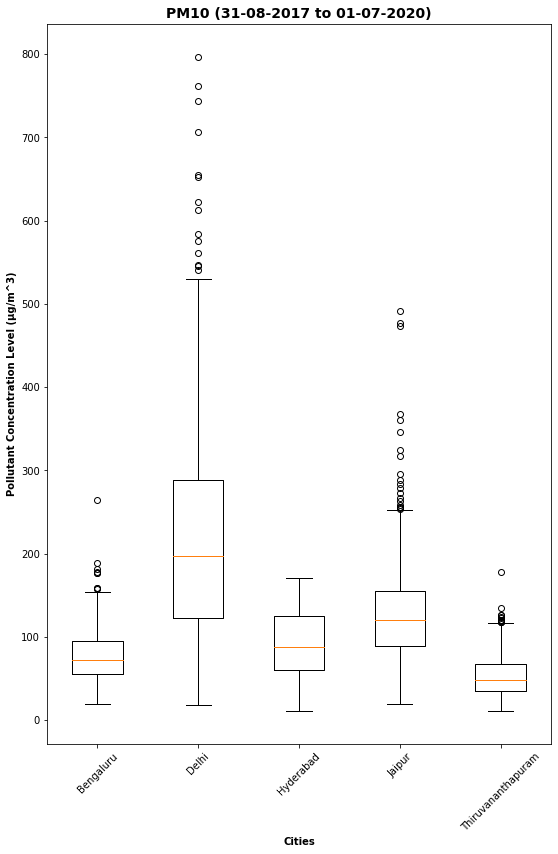



 c_d_SO2_fin.csv
['Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Hyderabad', 'Patna', 'Jaipur', 'Thiruvananthapuram']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


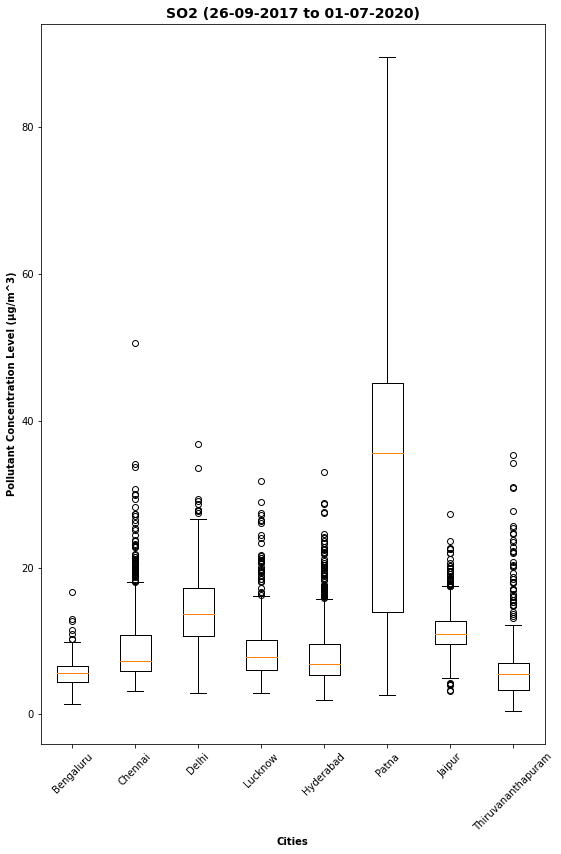



 c_d_Toluene_fin.csv
['Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Hyderabad', 'Patna', 'Jaipur']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


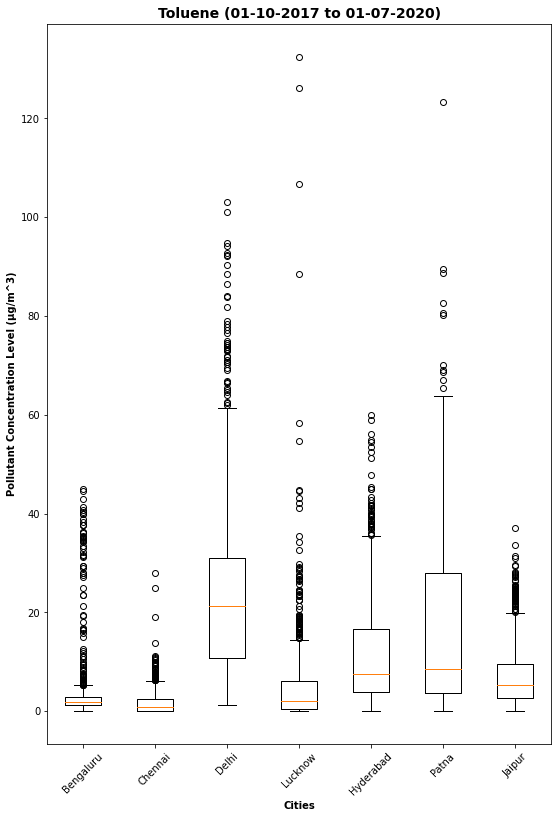



 c_d_CO_fin.csv
['Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Mumbai', 'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Jaipur', 'Thiruvananthapuram']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


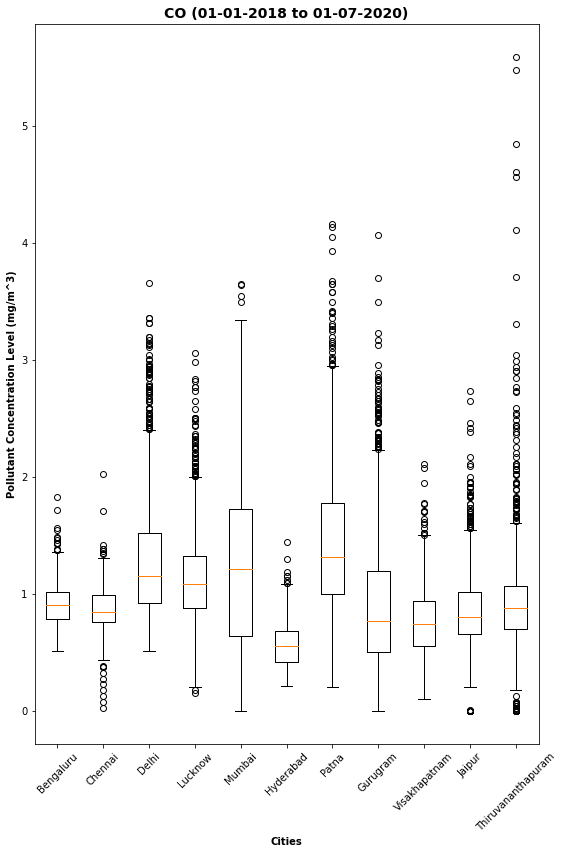

In [ ]:
#MAKE BOXPLOT FINAL

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

target_path='/content/drive/MyDrive/ML/air/fin/fin_graphs'

source_path='/content/drive/MyDrive/ML/air/fin'
source_list=os.listdir(source_path)
print(source_list)

for csv_file in source_list:
  if str(csv_file.split('.')[-1])=='csv' and str(csv_file.split('.')[0].split('_')[0])!='s':
    target_file=os.path.join(target_path,csv_file.split('.csv')[0])
    print('\n\n',csv_file)
    df = pd.read_csv(os.path.join(source_path,csv_file))
    # print(df)

    C=[]
    for col in df.columns[1:]:
      C.append(col)
    print(C)

    # Creating dataset
    np.random.seed(10)

    start=0
    start_date=(df['Date'].to_numpy()).flatten()[start]
    end_date=(df['Date'].to_numpy()).flatten()[len((df['Date'].to_numpy()).flatten())-1]
    data=[]
    for col in C:
      data_n = (df[col].to_numpy()).flatten()
      data.append(data_n[start:])
    # print(len(data))

    fig = plt.figure(figsize =(7, 10))

    # Creating axes instance
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_xticklabels(C, rotation=45, fontsize=10)

    # Creating labels
    if csv_file.split('.csv')[0].split('_')[-2] in ['PM2', 'PM10', 'NO', 'NO2', 'NH3', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']:
      level='µg/m^3'
    elif csv_file.split('.csv')[0].split('_')[-2] in ['CO']:
      level='mg/m^3'
    elif csv_file.split('.csv')[0].split('_')[-2] in ['NOx']:
      level='ppb'

    ax.set_title(csv_file.split('.csv')[0].split('_')[-2]+' ({} to {})'.format(start_date, end_date), fontsize=14, fontweight='bold')
    ax.set_xlabel('Cities',fontsize=10, fontweight='bold')
    if csv_file.split('.csv')[0].split('_')[-2] in ['AQI']:
      ax.set_ylabel('Air Quality Index',fontsize=10, fontweight='bold')
    else:
      ax.set_ylabel('Pollutant Concentration Level ({})'.format(level),fontsize=10, fontweight='bold')

    # Creating plot
    bp = ax.boxplot(data)

    # save and show plot
    plt.savefig(target_file+'_box.png',bbox_inches='tight')
    plt.show()
    plt.close()

In [ ]:
!cd fin

In [ ]:
!pwd

/content/drive/MyDrive/ML/air


['c_d_NH3_fin.csv', 'c_d_AQI_fin.csv', 'c_d_Benzene_fin.csv', 'c_d_NO_fin.csv', 'c_d_NO2_fin.csv', 'c_d_NOx_fin.csv', 'c_d_O3_fin.csv', 'c_d_PM2.5_fin.csv', 'c_d_PM10_fin.csv', 'c_d_SO2_fin.csv', 'c_d_Toluene_fin.csv', 'fin_graphs', 'c_d_CO_fin.csv']


 c_d_NH3_fin.csv


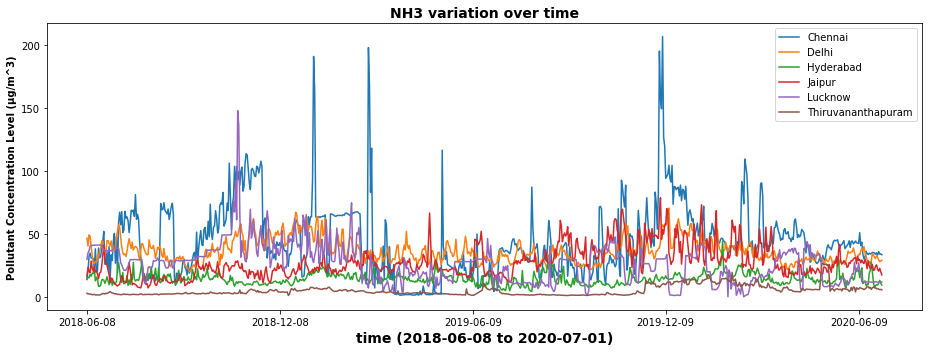



 c_d_AQI_fin.csv


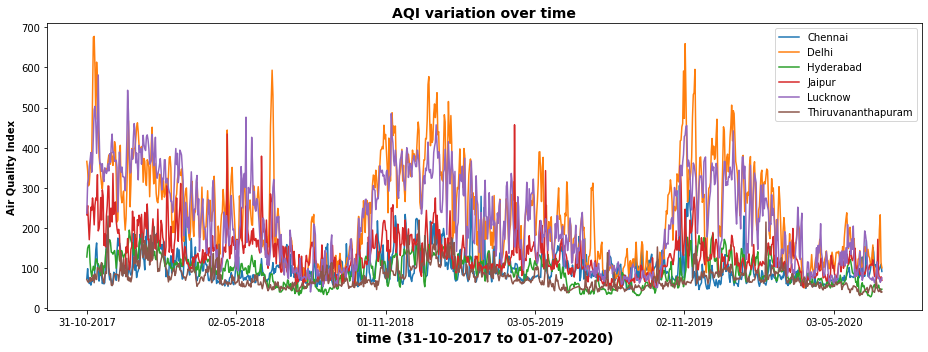



 c_d_Benzene_fin.csv


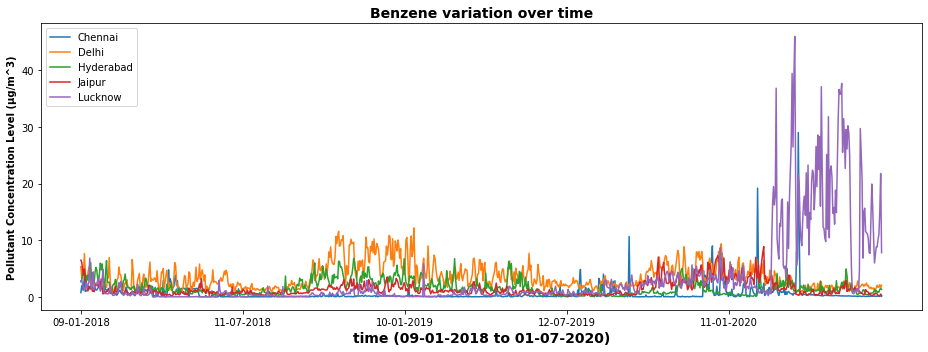



 c_d_NO_fin.csv


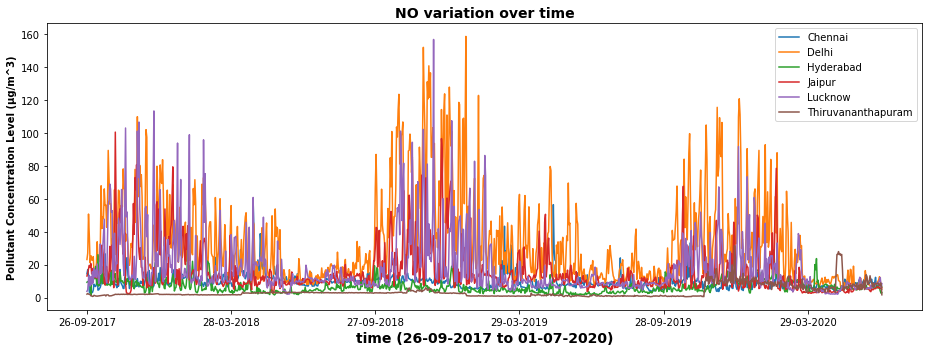



 c_d_NO2_fin.csv


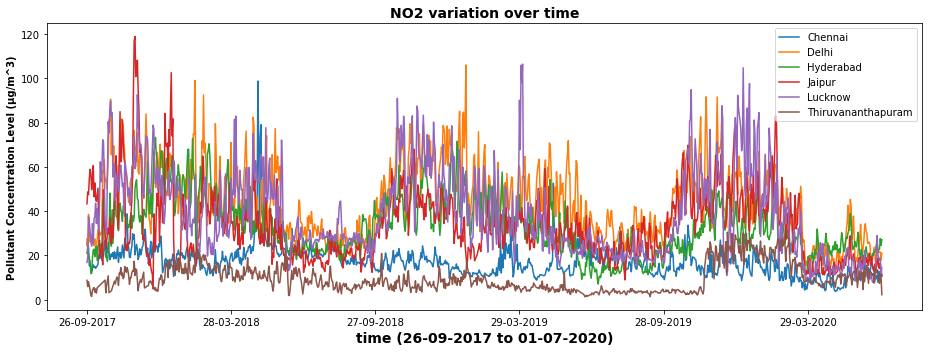



 c_d_NOx_fin.csv


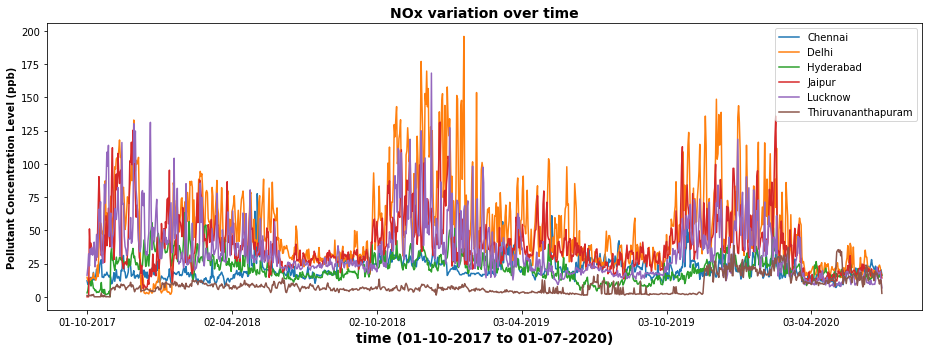



 c_d_O3_fin.csv


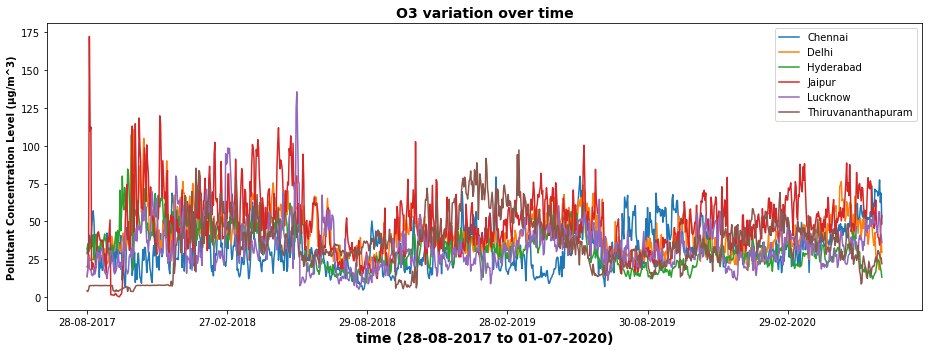



 c_d_PM2.5_fin.csv


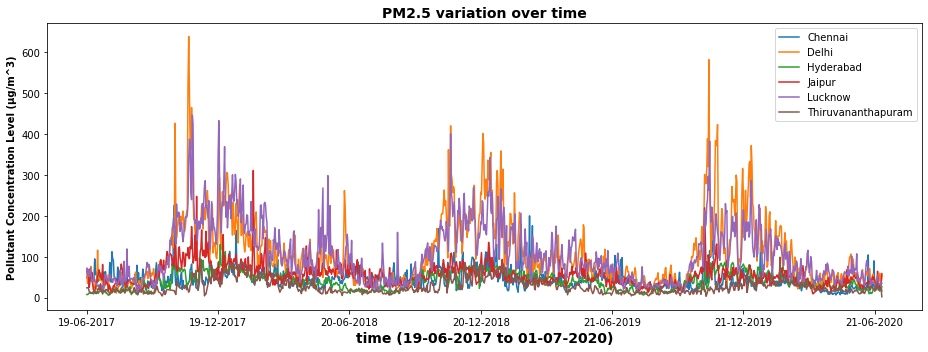



 c_d_PM10_fin.csv


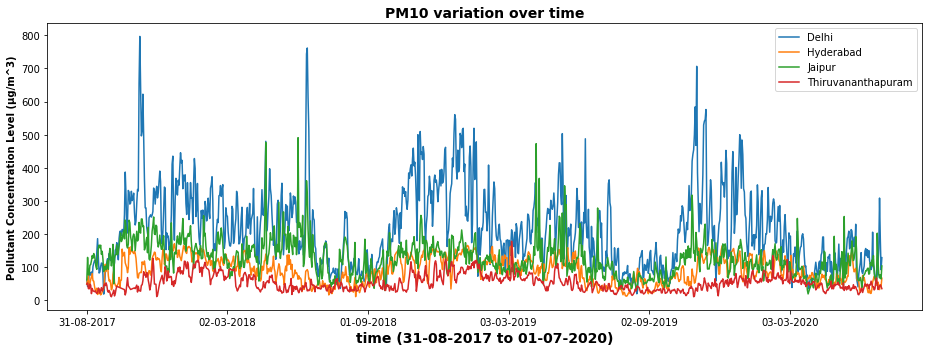



 c_d_SO2_fin.csv


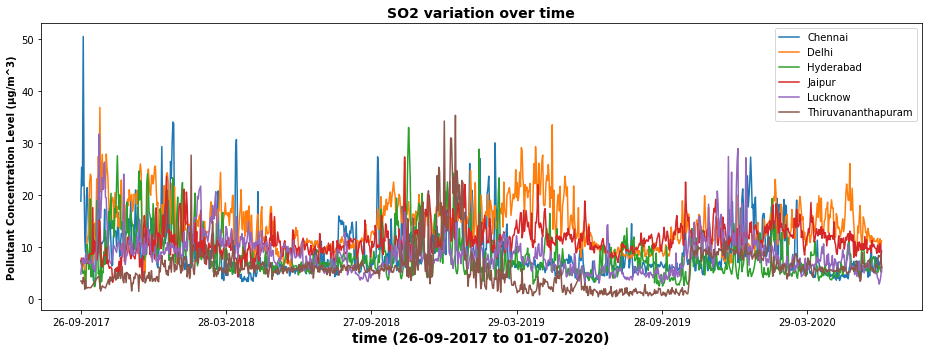



 c_d_Toluene_fin.csv


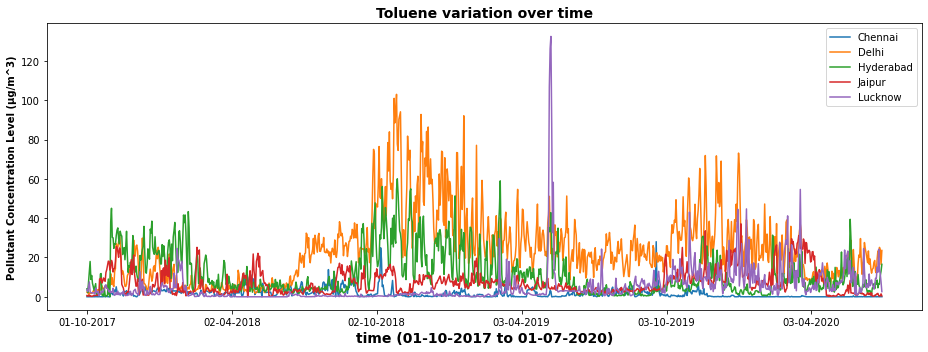



 c_d_CO_fin.csv


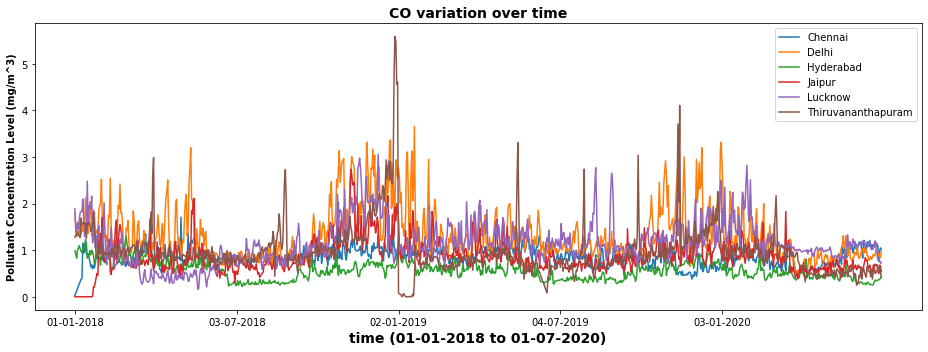

In [ ]:
#MAKE LINE GRAPH OF 7 CITIES

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

target_path='/content/drive/MyDrive/ML/air/fin/fin_graphs/viz'

source_path='/content/drive/MyDrive/ML/air/fin'
source_list=os.listdir(source_path)
print(source_list)

for csv_file in source_list:
  if str(csv_file.split('.')[-1])=='csv' and str(csv_file.split('.')[0].split('_')[0])!='s':
    target_file=os.path.join(target_path,csv_file.split('.csv')[0])
    print('\n\n',csv_file)
    df = pd.read_csv(os.path.join(source_path,csv_file))
    # print(df)

    C=['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Jaipur', 'Lucknow', 'Thiruvananthapuram']
    # for col in df.columns[1:]:
    #   C.append(col)
    # print(C)

    # Creating dataset
    np.random.seed(10)

    start=0
    start_date=(df['Date'].to_numpy()).flatten()[start]
    end_date=(df['Date'].to_numpy()).flatten()[len((df['Date'].to_numpy()).flatten())-1]
    C_new=[]
    data=[]
    for col in C:
      if col in df.columns[1:]:
        C_new.append(col)
        data_n = (df[col].to_numpy()).flatten()
        data.append(data_n[start:])
    # print(len(data))

    # fig = plt.figure(figsize =(7, 10))

    # # Creating axes instance
    # ax = fig.add_axes([0, 0, 1, 1])
    # ax.set_xticklabels(C, rotation=45, fontsize=10)

    # Creating labels
    if csv_file.split('.csv')[0].split('_')[-2] in ['PM2', 'PM10', 'NO', 'NO2', 'NH3', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']:
      level='µg/m^3'
    elif csv_file.split('.csv')[0].split('_')[-2] in ['CO']:
      level='mg/m^3'
    elif csv_file.split('.csv')[0].split('_')[-2] in ['NOx']:
      level='ppb'


    plt.figure(figsize=(13,5))
    plt.xlabel('time ({} to {})'.format(start_date, end_date), fontsize=14, fontweight='bold')
    if csv_file.split('.')[0].split('_')[-2] in ['AQI']:
      plt.ylabel('Air Quality Index',fontsize=10, fontweight='bold')
    else:
      plt.ylabel('Pollutant Concentration Level ({})'.format(level),fontsize=10, fontweight='bold')
    plt.title(csv_file.split('.csv')[0].split('_')[-2]+' variation over time', fontsize=14, fontweight='bold')


    plt.xticks(np.arange(0,len((df['Date'].to_numpy()).flatten()),183), (df['Date'].to_numpy()).flatten()[0::183])
    # plt.xticks(np.arange(0,len((df['Date'].to_numpy()).flatten()),1), [i if i in range(0,len((df['Date'].to_numpy()).flatten()),180) else '' for i in range(len((df['Date'].to_numpy()).flatten()))])
    # plt.set_xticklabels(['01-01-2018', '01-06-2018', '01-01-2019', '01-06-2019', '01-01-2020', '01-06-2020'], rotation=45, fontsize=10)

    for idx in range(len(C_new)):
      plt.plot((df['Date'].to_numpy()).flatten(),data[idx],label=C_new[idx],linewidth=1.5)
    plt.legend()

    # save and show plot
    plt.savefig(target_file+'_line.png',bbox_inches='tight')
    plt.show()
    plt.close()

In [ ]:
d_list=[]
print((df['Date'].to_numpy()).flatten()[10])
for day in (df['Date'].to_numpy()).flatten():
  if ('-').join(day.split('-')[:2])=='01-01' or ('-').join(day.split('-')[:2])=='01-06':
    d_list.append(day)

print(d_list)

11-01-2018
['01-01-2018', '01-06-2018', '01-01-2019', '01-06-2019', '01-01-2020', '01-06-2020']


['c_d_NH3_fin.csv', 'c_d_AQI_fin.csv', 'c_d_Benzene_fin.csv', 'c_d_NO_fin.csv', 'c_d_NO2_fin.csv', 'c_d_NOx_fin.csv', 'c_d_O3_fin.csv', 'c_d_PM2.5_fin.csv', 'c_d_PM10_fin.csv', 'c_d_SO2_fin.csv', 'c_d_Toluene_fin.csv', 'fin_graphs', 'c_d_CO_fin.csv']


 c_d_NH3_fin.csv
['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Jaipur', 'Lucknow', 'Thiruvananthapuram', 'Bengaluru', 'Visakhapatnam', 'Amritsar']


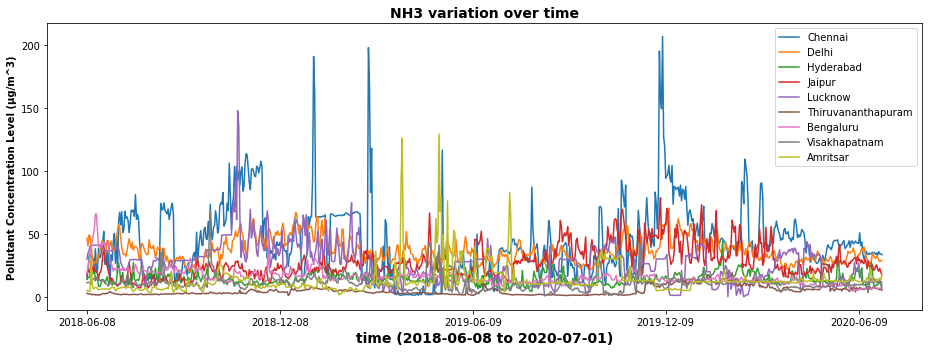



 c_d_AQI_fin.csv
['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Jaipur', 'Lucknow', 'Thiruvananthapuram', 'Bengaluru', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar']


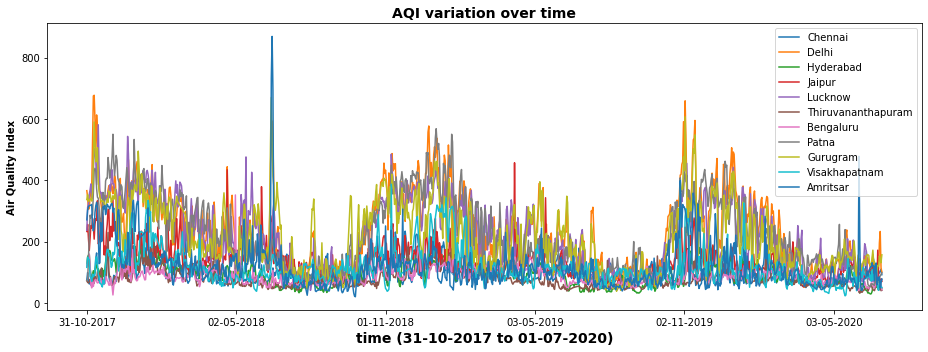



 c_d_Benzene_fin.csv
['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Jaipur', 'Lucknow', 'Thiruvananthapuram', 'Bengaluru', 'Mumbai', 'Patna', 'Visakhapatnam']


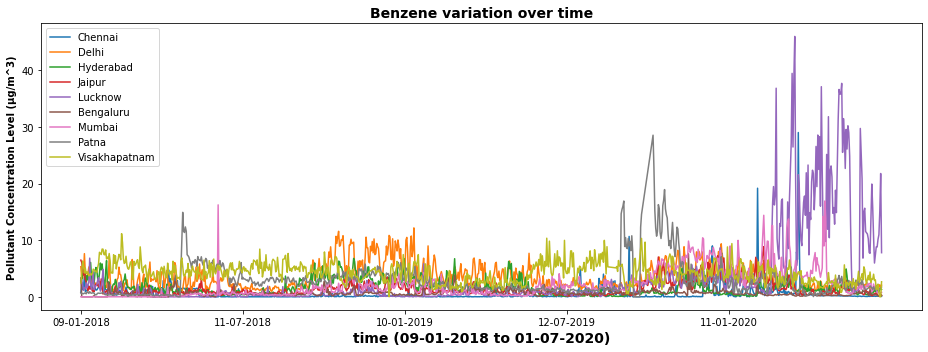



 c_d_NO_fin.csv
['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Jaipur', 'Lucknow', 'Thiruvananthapuram', 'Bengaluru', 'Patna', 'Gurugram', 'Visakhapatnam']


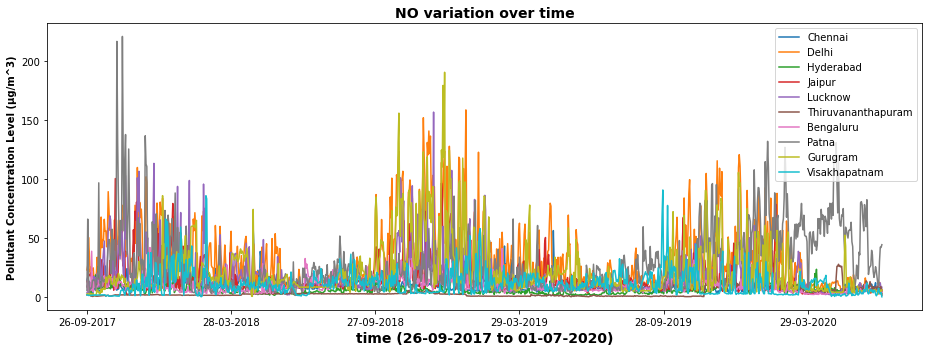



 c_d_NO2_fin.csv
['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Jaipur', 'Lucknow', 'Thiruvananthapuram', 'Bengaluru', 'Patna', 'Gurugram', 'Amritsar']


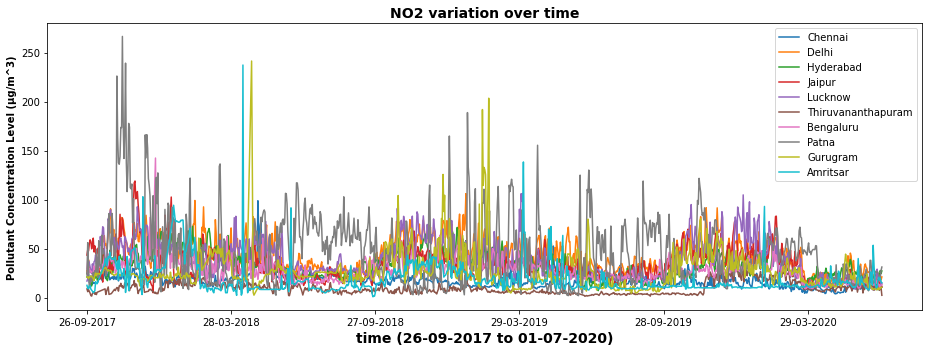



 c_d_NOx_fin.csv
['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Jaipur', 'Lucknow', 'Thiruvananthapuram', 'Bengaluru', 'Patna', 'Visakhapatnam']


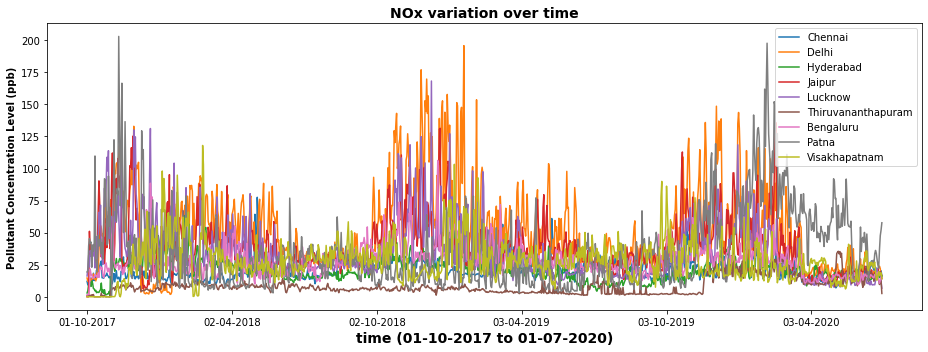



 c_d_O3_fin.csv
['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Jaipur', 'Lucknow', 'Thiruvananthapuram', 'Bengaluru', 'Gurugram']


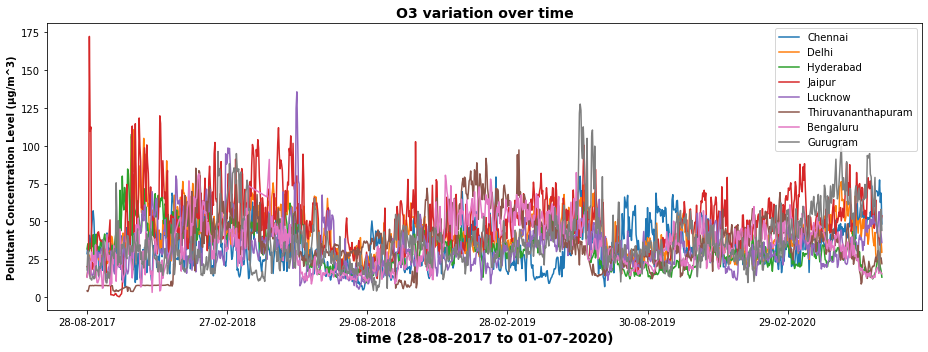



 c_d_PM2.5_fin.csv
['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Jaipur', 'Lucknow', 'Thiruvananthapuram', 'Bengaluru', 'Gurugram']


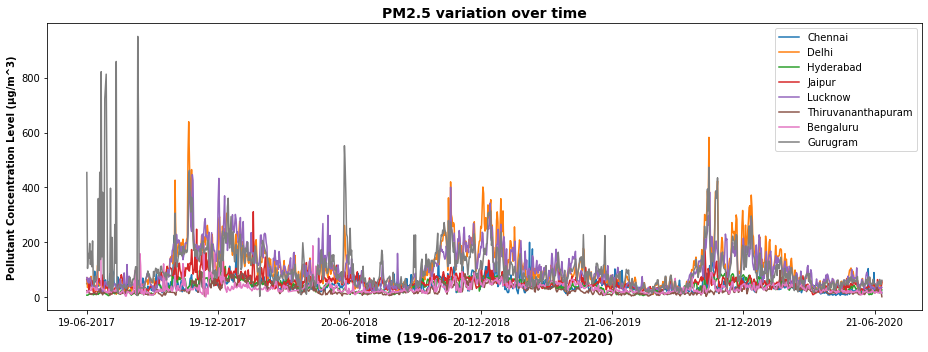



 c_d_PM10_fin.csv
['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Jaipur', 'Lucknow', 'Thiruvananthapuram', 'Bengaluru']


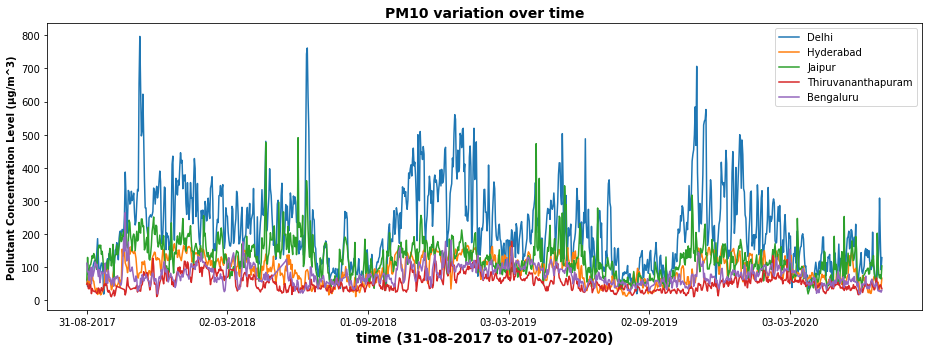



 c_d_SO2_fin.csv
['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Jaipur', 'Lucknow', 'Thiruvananthapuram', 'Bengaluru', 'Patna']


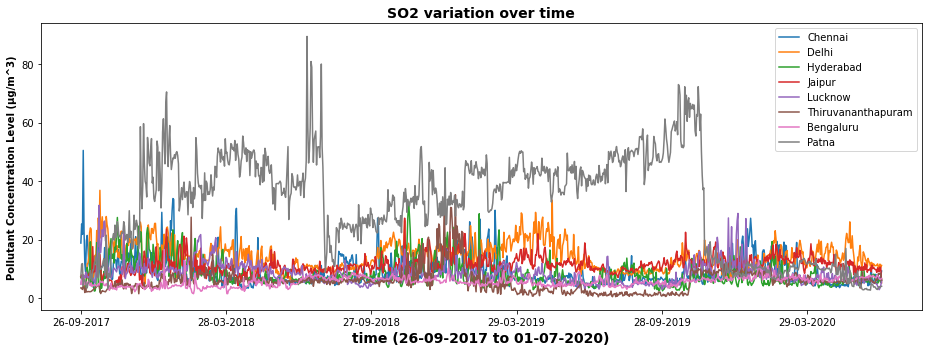



 c_d_Toluene_fin.csv
['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Jaipur', 'Lucknow', 'Thiruvananthapuram', 'Bengaluru', 'Patna']


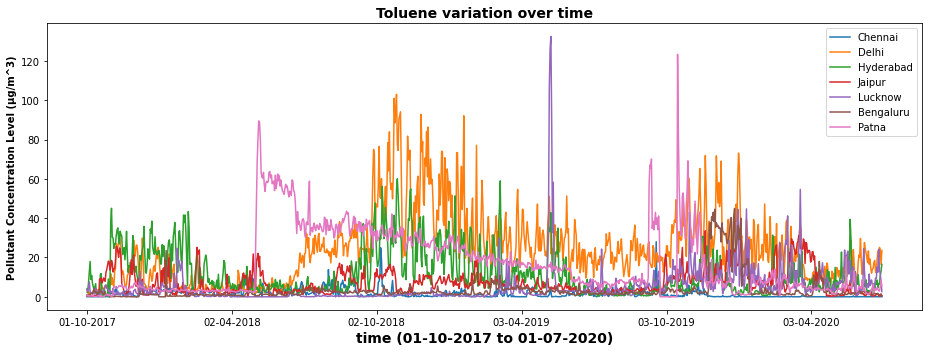



 c_d_CO_fin.csv
['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Jaipur', 'Lucknow', 'Thiruvananthapuram', 'Bengaluru', 'Mumbai', 'Patna', 'Gurugram', 'Visakhapatnam']


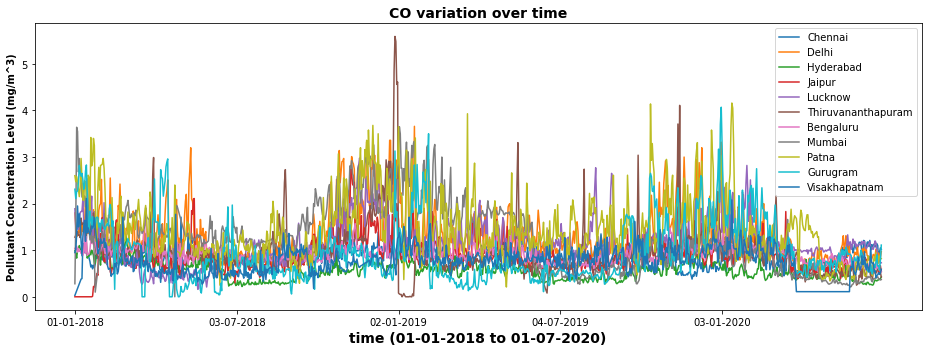

In [ ]:
#MAKE LINE GRAPH OF ALL CITIES

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

target_path='/content/drive/MyDrive/ML/air/fin/fin_graphs/viz/all'

source_path='/content/drive/MyDrive/ML/air/fin'
source_list=os.listdir(source_path)
print(source_list)

for csv_file in source_list:
  if str(csv_file.split('.')[-1])=='csv' and str(csv_file.split('.')[0].split('_')[0])!='s':
    target_file=os.path.join(target_path,csv_file.split('.csv')[0])
    print('\n\n',csv_file)
    df = pd.read_csv(os.path.join(source_path,csv_file))
    # print(df)

    C=['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Jaipur', 'Lucknow', 'Thiruvananthapuram']
    for col in df.columns[1:]:
      if col not in C:
        C.append(col)
    print(C)

    # Creating dataset
    np.random.seed(10)

    start=0
    start_date=(df['Date'].to_numpy()).flatten()[start]
    end_date=(df['Date'].to_numpy()).flatten()[len((df['Date'].to_numpy()).flatten())-1]
    C_new=[]
    data=[]
    for col in C:
      if col in df.columns[1:]:
        C_new.append(col)
        data_n = (df[col].to_numpy()).flatten()
        data.append(data_n[start:])
    # print(len(data))

    # fig = plt.figure(figsize =(7, 10))

    # # Creating axes instance
    # ax = fig.add_axes([0, 0, 1, 1])
    # ax.set_xticklabels(C, rotation=45, fontsize=10)

    # Creating labels
    if csv_file.split('.csv')[0].split('_')[-2] in ['PM2', 'PM10', 'NO', 'NO2', 'NH3', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']:
      level='µg/m^3'
    elif csv_file.split('.csv')[0].split('_')[-2] in ['CO']:
      level='mg/m^3'
    elif csv_file.split('.csv')[0].split('_')[-2] in ['NOx']:
      level='ppb'


    plt.figure(figsize=(13,5))
    plt.xlabel('time ({} to {})'.format(start_date, end_date), fontsize=14, fontweight='bold')
    if csv_file.split('.')[0].split('_')[-2] in ['AQI']:
      plt.ylabel('Air Quality Index',fontsize=10, fontweight='bold')
    else:
      plt.ylabel('Pollutant Concentration Level ({})'.format(level),fontsize=10, fontweight='bold')
    plt.title(csv_file.split('.csv')[0].split('_')[-2]+' variation over time', fontsize=14, fontweight='bold')


    plt.xticks(np.arange(0,len((df['Date'].to_numpy()).flatten()),183), (df['Date'].to_numpy()).flatten()[0::183])
    # plt.xticks(np.arange(0,len((df['Date'].to_numpy()).flatten()),1), [i if i in range(0,len((df['Date'].to_numpy()).flatten()),180) else '' for i in range(len((df['Date'].to_numpy()).flatten()))])
    # plt.set_xticklabels(['01-01-2018', '01-06-2018', '01-01-2019', '01-06-2019', '01-01-2020', '01-06-2020'], rotation=45, fontsize=10)

    for idx in range(len(C_new)):
      plt.plot((df['Date'].to_numpy()).flatten(),data[idx],label=C_new[idx],linewidth=1.5)
    plt.legend()

    # save and show plot
    plt.savefig(target_file+'_line.png',bbox_inches='tight')
    plt.show()
    plt.close()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import numpy as np
from scipy import stats
import sys

target_path='/content/drive/MyDrive/ML/air/fin/fin_graphs/hypo'
target_file=os.path.join(target_path,'AQI_Delhi')

for csv_file in os.listdir('/content/drive/MyDrive/ML/air/fin'):
  if csv_file.split('.')[-1]!='csv' or csv_file.split('_')[2]=='NH3':
    continue
  aqi_df = pd.read_csv('/content/drive/MyDrive/ML/air/fin/'+csv_file)
  print(csv_file)

  start_date="01-01-2020"
  end_date="01-07-2020"

  start = None
  end = None

  cities_arr = [x for x in aqi_df.columns]

  A=[]
  for item in cities_arr:
    A.append(np.array(aqi_df[item]))

  for i in range(len(A[0])):
    if A[0][i]==start_date:
      start=i
    if A[0][i]==end_date:
      end=i+1
  if start is None:
    start=0
    print("start date error, changed to {}".format(A[0][0]))
  if (start and end) is None:
    sys.exit("ERROR in date")

  print(start_date,end_date)


  for i in range(np.array(A).shape[0]-1):
    data=A[i+1][start:end]
    print(aqi_df.columns[i+1],np.mean(data))
  print('\n')

c_d_AQI_fin.csv
01-01-2020 01-07-2020
Bengaluru 79.71584699453553
Chennai 80.25136612021858
Delhi 181.672131147541
Lucknow 157.12568306010928
Hyderabad 78.17486338797814
Patna 162.2513661202186
Gurugram 158.65573770491804
Visakhapatnam 84.5
Amritsar 91.9153005464481
Jaipur 105.12021857923497
Thiruvananthapuram 66.46448087431693


c_d_Benzene_fin.csv
01-01-2020 01-07-2020
Bengaluru 0.4583060109289618
Chennai 1.0356284153005464
Delhi 2.6946448087431696
Lucknow 12.232349726775956
Mumbai 4.228251366120219
Hyderabad 1.1879234972677595
Patna 1.98775956284153
Visakhapatnam 3.334863387978142
Jaipur 1.9290710382513663


c_d_NO_fin.csv
01-01-2020 01-07-2020
Bengaluru 5.308142076502733
Chennai 8.034043715846995
Delhi 22.692240437158468
Lucknow 12.69978142076503
Hyderabad 8.490874316939891
Patna 56.41393442622951
Gurugram 15.099508196721311
Visakhapatnam 6.6494535519125675
Jaipur 8.305737704918034
Thiruvananthapuram 8.51551912568306


c_d_NO2_fin.csv
01-01-2020 01-07-2020
Bengaluru 21.410163934426

In [ ]:
import pandas as pd
import numpy as np

aqi_df = pd.read_csv("/content/drive/MyDrive/ML/air/ws_fill/c_d_AQI.csv",usecols=['Date','Delhi'])
A = [np.array(aqi_df["Date"]),np.array(aqi_df["Delhi"])]

aqi_df = pd.read_csv("/content/drive/MyDrive/ML/air/ws_fill/c_d_AQI.csv",index_col=['Date'],usecols=['Date','Delhi'])
print(aqi_df)
print(aqi_df.mean())
print(aqi_df.median())
print(aqi_df.mode())
print(aqi_df.std())



            Delhi
Date             
2015-01-01  472.0
2015-01-02  454.0
2015-01-03  143.0
2015-01-04  319.0
2015-01-05  325.0
...           ...
2020-06-27  112.0
2020-06-28  196.0
2020-06-29  233.0
2020-06-30  114.0
2020-07-01  101.0

[2009 rows x 1 columns]
Delhi    258.621453
dtype: float64
Delhi    257.0
dtype: float64
   Delhi
0  123.0
Delhi    119.897735
dtype: float64


0 1826 0
266.3332420591457
266.0
ModeResult(mode=array([334.]), count=array([12]))
119.73719575728899


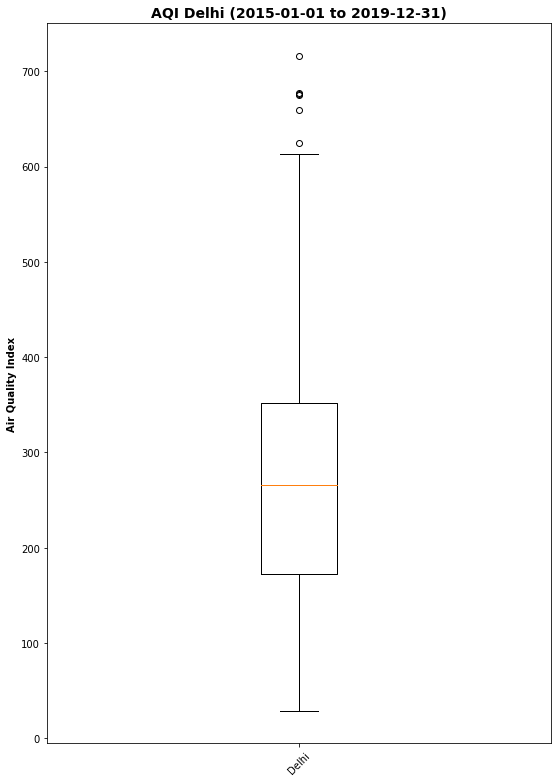

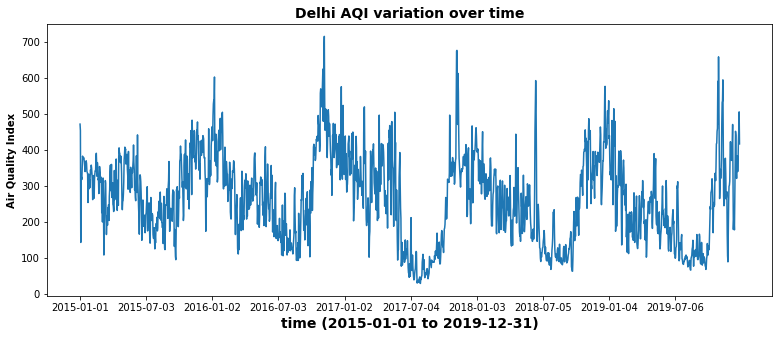

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import numpy as np
from scipy import stats
import sys

target_path='/content/drive/MyDrive/ML/air/fin/fin_graphs/hypo'
target_file=os.path.join(target_path,'AQI_Delhi')

start_date="2015-01-01"
end_date="2019-12-31"
start = None
end = None

for i in range(len(A[1])):
  if A[0][i]==start_date:
    start=i
  if A[0][i]==end_date:
    end=i+1
print(start, end, (start and end))
if (start and end) is None:
  sys.exit("ERROR in date")
data=A[1][start:end]

print(np.mean(data))
print(np.median(data))
print(stats.mode(data))
print(np.std(data))

fig = plt.figure(figsize =(7, 10))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['Delhi'], rotation=45, fontsize=10)
ax.set_title('AQI Delhi ({} to {})'.format(start_date, end_date), fontsize=14, fontweight='bold')
ax.set_ylabel('Air Quality Index',fontsize=10, fontweight='bold')
bp = ax.boxplot(data)

plt.savefig(target_file+'_box.png',bbox_inches='tight')
plt.show()
plt.close()



plt.figure(figsize=(13,5))
plt.xlabel('time ({} to {})'.format(start_date, end_date), fontsize=14, fontweight='bold')
plt.ylabel('Air Quality Index',fontsize=10, fontweight='bold')
plt.title('Delhi AQI variation over time', fontsize=14, fontweight='bold')
plt.xticks(np.arange(0,len(A[0][start:end]),183), (A[0][start::183]))
plt.plot(A[0][start:end],data,linewidth=1.5)

# save and show plot
# plt.savefig(target_file+'_line.png',bbox_inches='tight')
plt.show()
plt.close()


In [ ]:
print(start, end)
X = A[1][start:end]
print(X[:10],X[-10:])
X.sort()
print(X[:10],X[-10:])
print(len(X))


0 1826
[472. 454. 143. 319. 325. 318. 353. 383. 375. 376.] [351. 321. 376. 384. 340. 372. 425. 455. 506. 417.]
[29. 30. 30. 32. 35. 37. 37. 39. 40. 40.] [597. 603. 603. 613. 625. 659. 675. 676. 677. 716.]
1826


In [ ]:
# finding the 1st quartile
q1 = np.quantile(X, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(X, 0.75)
med = np.median(X)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound, med)

179.75 621.625 -97.375 266.0


In [ ]:
outliers = X[(X <= lower_bound) | (X >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))

The following are the outliers in the boxplot:[625. 659. 675. 676. 677. 716.]


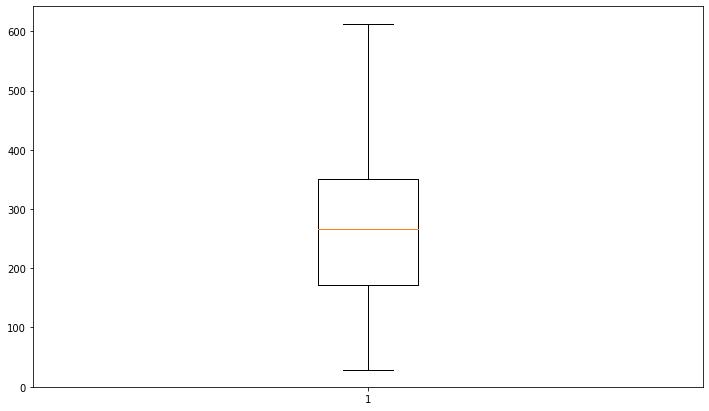

In [ ]:

# boxplot of data within the whisker
X2 = X[(X >= lower_bound) & (X <= upper_bound)]
plt.figure(figsize=(12, 7))
plt.boxplot(X2)
plt.show()

264.99807692307695 117.64072366763197
35
[5, 45, 140, 150, 151, 166, 180, 177, 200, 194, 175, 117, 88, 46, 22, 14, 8, 5, 0, 0]
[0, 35, 70, 105, 140, 175, 210, 245, 280, 315, 350, 385, 420, 455, 490, 525, 560, 595, 630, 665]


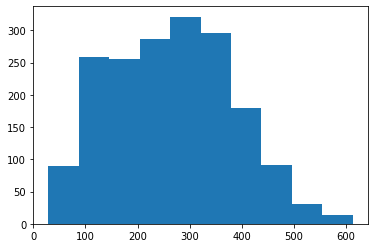

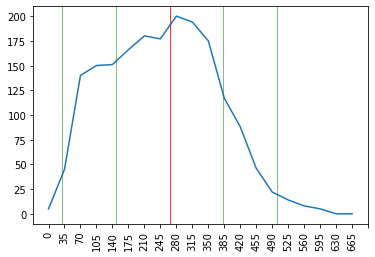

In [ ]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

mean = np.mean(X2)
std = np.std(X2)
print(mean, std)
max = 700
min = 0
interval = 20
n = m.floor((max-min)/interval)

l1=min
l2=min+n
x_m=((mean-min)*interval)/(max-min)
x_s=((std)*interval)/(max-min)

x=[]
for i in range(interval+1):
  x.append(i)

pdist=[]
labels=[]
while l1<max:
  counter=0
  for i in X2:
    if i>=l1 and i<=l2:
      counter+=1
  labels.append(l1)
  pdist.append(counter)
  l1=l2
  l2+=n

print(n)
print(pdist)
print(labels)


plt.hist(X2)
plt.show()
plt.close()


plt.plot(pdist)  # Plot the chart
plt.xticks(x, labels, rotation ='vertical')
plt.axvline(x = x_m, color = 'r',linewidth=0.8)
plt.axvline(x = x_m-x_s, color = 'g',linewidth=0.5)
plt.axvline(x = x_m+x_s, color = 'g',linewidth=0.5)
plt.axvline(x = x_m-(2*x_s), color = 'g',linewidth=0.5)
plt.axvline(x = x_m+(2*x_s), color = 'g',linewidth=0.5)
plt.show()  # display
plt.close()

In [ ]:
sum=0
for i in X2:
  sum+=m.pow((i-mean),2)
s=m.sqrt(sum/(len(X2)-1))
print(s)
s_t=s/m.sqrt(len(X2))
print(s_t)

112.72813462712642
5.924859216107575


In [ ]:
"""
2015:
  datapoints freq dist:
    mean = 297.025
    std = 81.855
  mean freq dist:
    mean(x') = 297.025
    std(s_m) = 4.284

2020:
  mean(mu) = 178.282
"""

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import numpy as np
from scipy import stats
import sys

target_path='/content/drive/MyDrive/ML/air/fin/fin_graphs/hypo'
target_file=os.path.join(target_path,'AQI_Delhi')

for csv_file in os.listdir('/content/drive/MyDrive/ML/air/fin'):
  if csv_file.split('.')[-1]!='csv' or csv_file.split('_')[2]=='NH3':
    continue
  aqi_df = pd.read_csv('/content/drive/MyDrive/ML/air/fin/'+csv_file)
  print(csv_file)

  start_date="01-01-2020"
  end_date="01-07-2020"

  start = None
  end = None

  cities_arr = [x for x in aqi_df.columns]

  A=[]
  for item in cities_arr:
    A.append(np.array(aqi_df[item]))

  for i in range(len(A[0])):
    if A[0][i]==start_date:
      start=i
    if A[0][i]==end_date:
      end=i+1
  if start is None:
    start=0
    print("start date error, changed to {}".format(A[0][0]))
  if (start and end) is None:
    sys.exit("ERROR in date")

  print(start_date,end_date)


  for i in range(np.array(A).shape[0]-1):
    data=A[i+1][start:end]
    print(aqi_df.columns[i+1],np.mean(data))
  print('\n')

[ 95. 104. 108. 123. 125. 127. 132. 136. 140. 141. 142. 143. 148. 149.
 150. 154. 155. 160. 165. 165. 166. 170. 172. 174. 174. 175. 175. 175.
 175. 179. 181. 181. 184. 184. 184. 185. 187. 188. 188. 188. 188. 191.
 192. 193. 196. 197. 197. 197. 198. 198. 199. 200. 202. 204. 204. 204.
 205. 207. 207. 208. 209. 209. 210. 213. 214. 214. 216. 217. 217. 217.
 218. 218. 218. 218. 219. 220. 220. 223. 223. 225. 226. 226. 226. 228.
 229. 229. 230. 230. 232. 232. 232. 234. 234. 234. 234. 235. 236. 238.
 238. 239. 239. 240. 240. 244. 244. 245. 245. 246. 247. 247. 248. 248.
 249. 250. 252. 253. 254. 254. 257. 258. 258. 259. 259. 260. 261. 262.
 262. 262. 263. 266. 266. 266. 266. 266. 268. 268. 268. 270. 270. 271.
 271. 274. 274. 275. 276. 279. 279. 281. 282. 282. 282. 282. 283. 283.
 284. 285. 286. 287. 288. 289. 289. 290. 290. 290. 291. 292. 292. 292.
 293. 293. 295. 295. 295. 296. 296. 297. 297. 298. 298. 298. 298. 299.
 303. 304. 307. 308. 308. 309. 309. 310. 310. 312. 312. 313. 313. 313.
 314. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


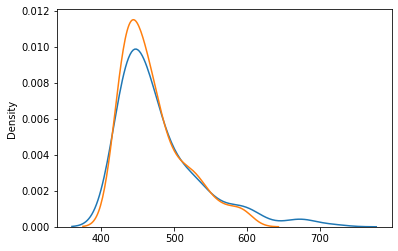

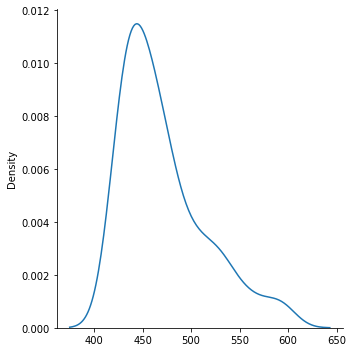

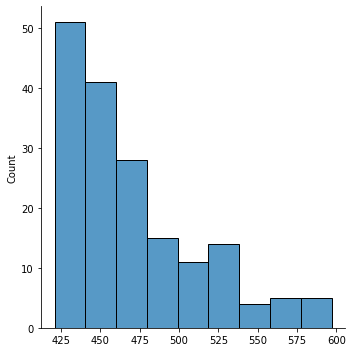

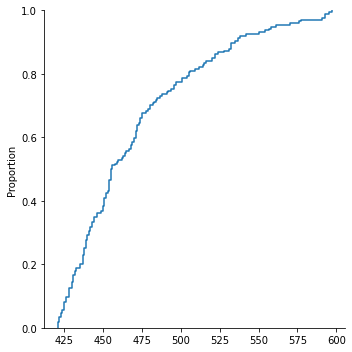

In [ ]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(X, hist=False, label='normal')
sns.distplot(X2, hist=False, label='normal')
sns.displot(X2, kind='kde', label='normal')
sns.displot(X2, kind='hist', label='normal')
sns.displot(X2, kind='ecdf', label='normal')

plt.show()

In [ ]:
from numpy import random

x = random.binomial(n=10, p=0.5, size=10)

print(x)

[6 5 9 4 5 4 6 4 6 3]


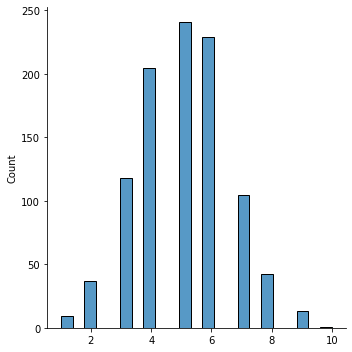

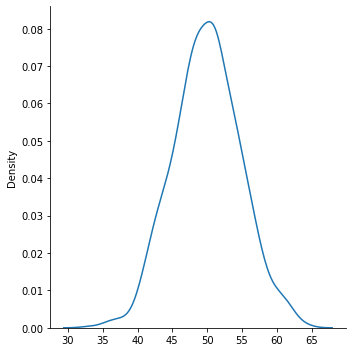

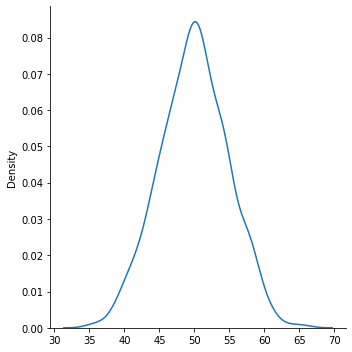

In [ ]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(random.binomial(n=10, p=0.5, size=1000), kde=False)

plt.show()


from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(random.normal(loc=50, scale=5, size=1000), kind='kde', label='normal',)
sns.displot(random.binomial(n=100, p=0.5, size=1000), kind='kde', label='binomial')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



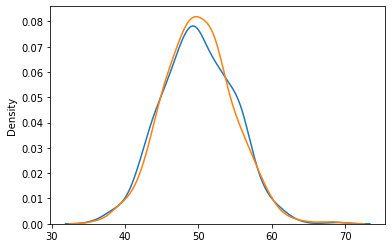

In [ ]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

a1=random.normal(loc=50, scale=5, size=1000)
a2=random.binomial(n=100, p=0.5, size=1000)

sns.distplot(a1, hist=False, label='normal')
sns.distplot(a2, hist=False, label='binomial')

plt.show()

In [ ]:
print(a1)

[51.94331072 52.32565934 41.09568316 58.48619746 42.7253429  56.45912081
 58.05177514 48.16652902 50.26480773 55.30276022 45.50282592 47.78282913
 48.73932944 43.87904266 53.72296214 49.87566937 44.30361065 55.89881301
 52.87270495 54.10069253 48.96225374 48.22586236 49.5703975  57.0639554
 50.74457699 46.73857209 51.01539441 51.20638154 57.36800718 50.54630404
 46.48501038 56.76251931 48.6417737  55.20640526 44.01318856 49.53924619
 38.02108597 52.37229403 44.81850815 45.73770079 53.34681163 44.36505979
 40.83543595 48.30649204 47.02918736 48.68239919 50.93027408 55.05804703
 56.66239664 56.87696955 46.99299331 56.06900514 44.45738494 57.14128246
 44.31618819 52.26263296 47.06870325 52.00424684 44.22052396 46.74270154
 54.17205459 49.636253   46.71675756 56.49043337 52.18538485 55.33106858
 45.28197868 44.92400388 55.33007428 45.71478425 47.00184707 54.4753609
 40.14284311 50.2506709  54.75681544 53.87432375 46.53854602 49.50319239
 54.98600085 48.25753988 50.12824135 55.0168101  48.9